## Machine Learning Plot

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_31901/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_31901/32172

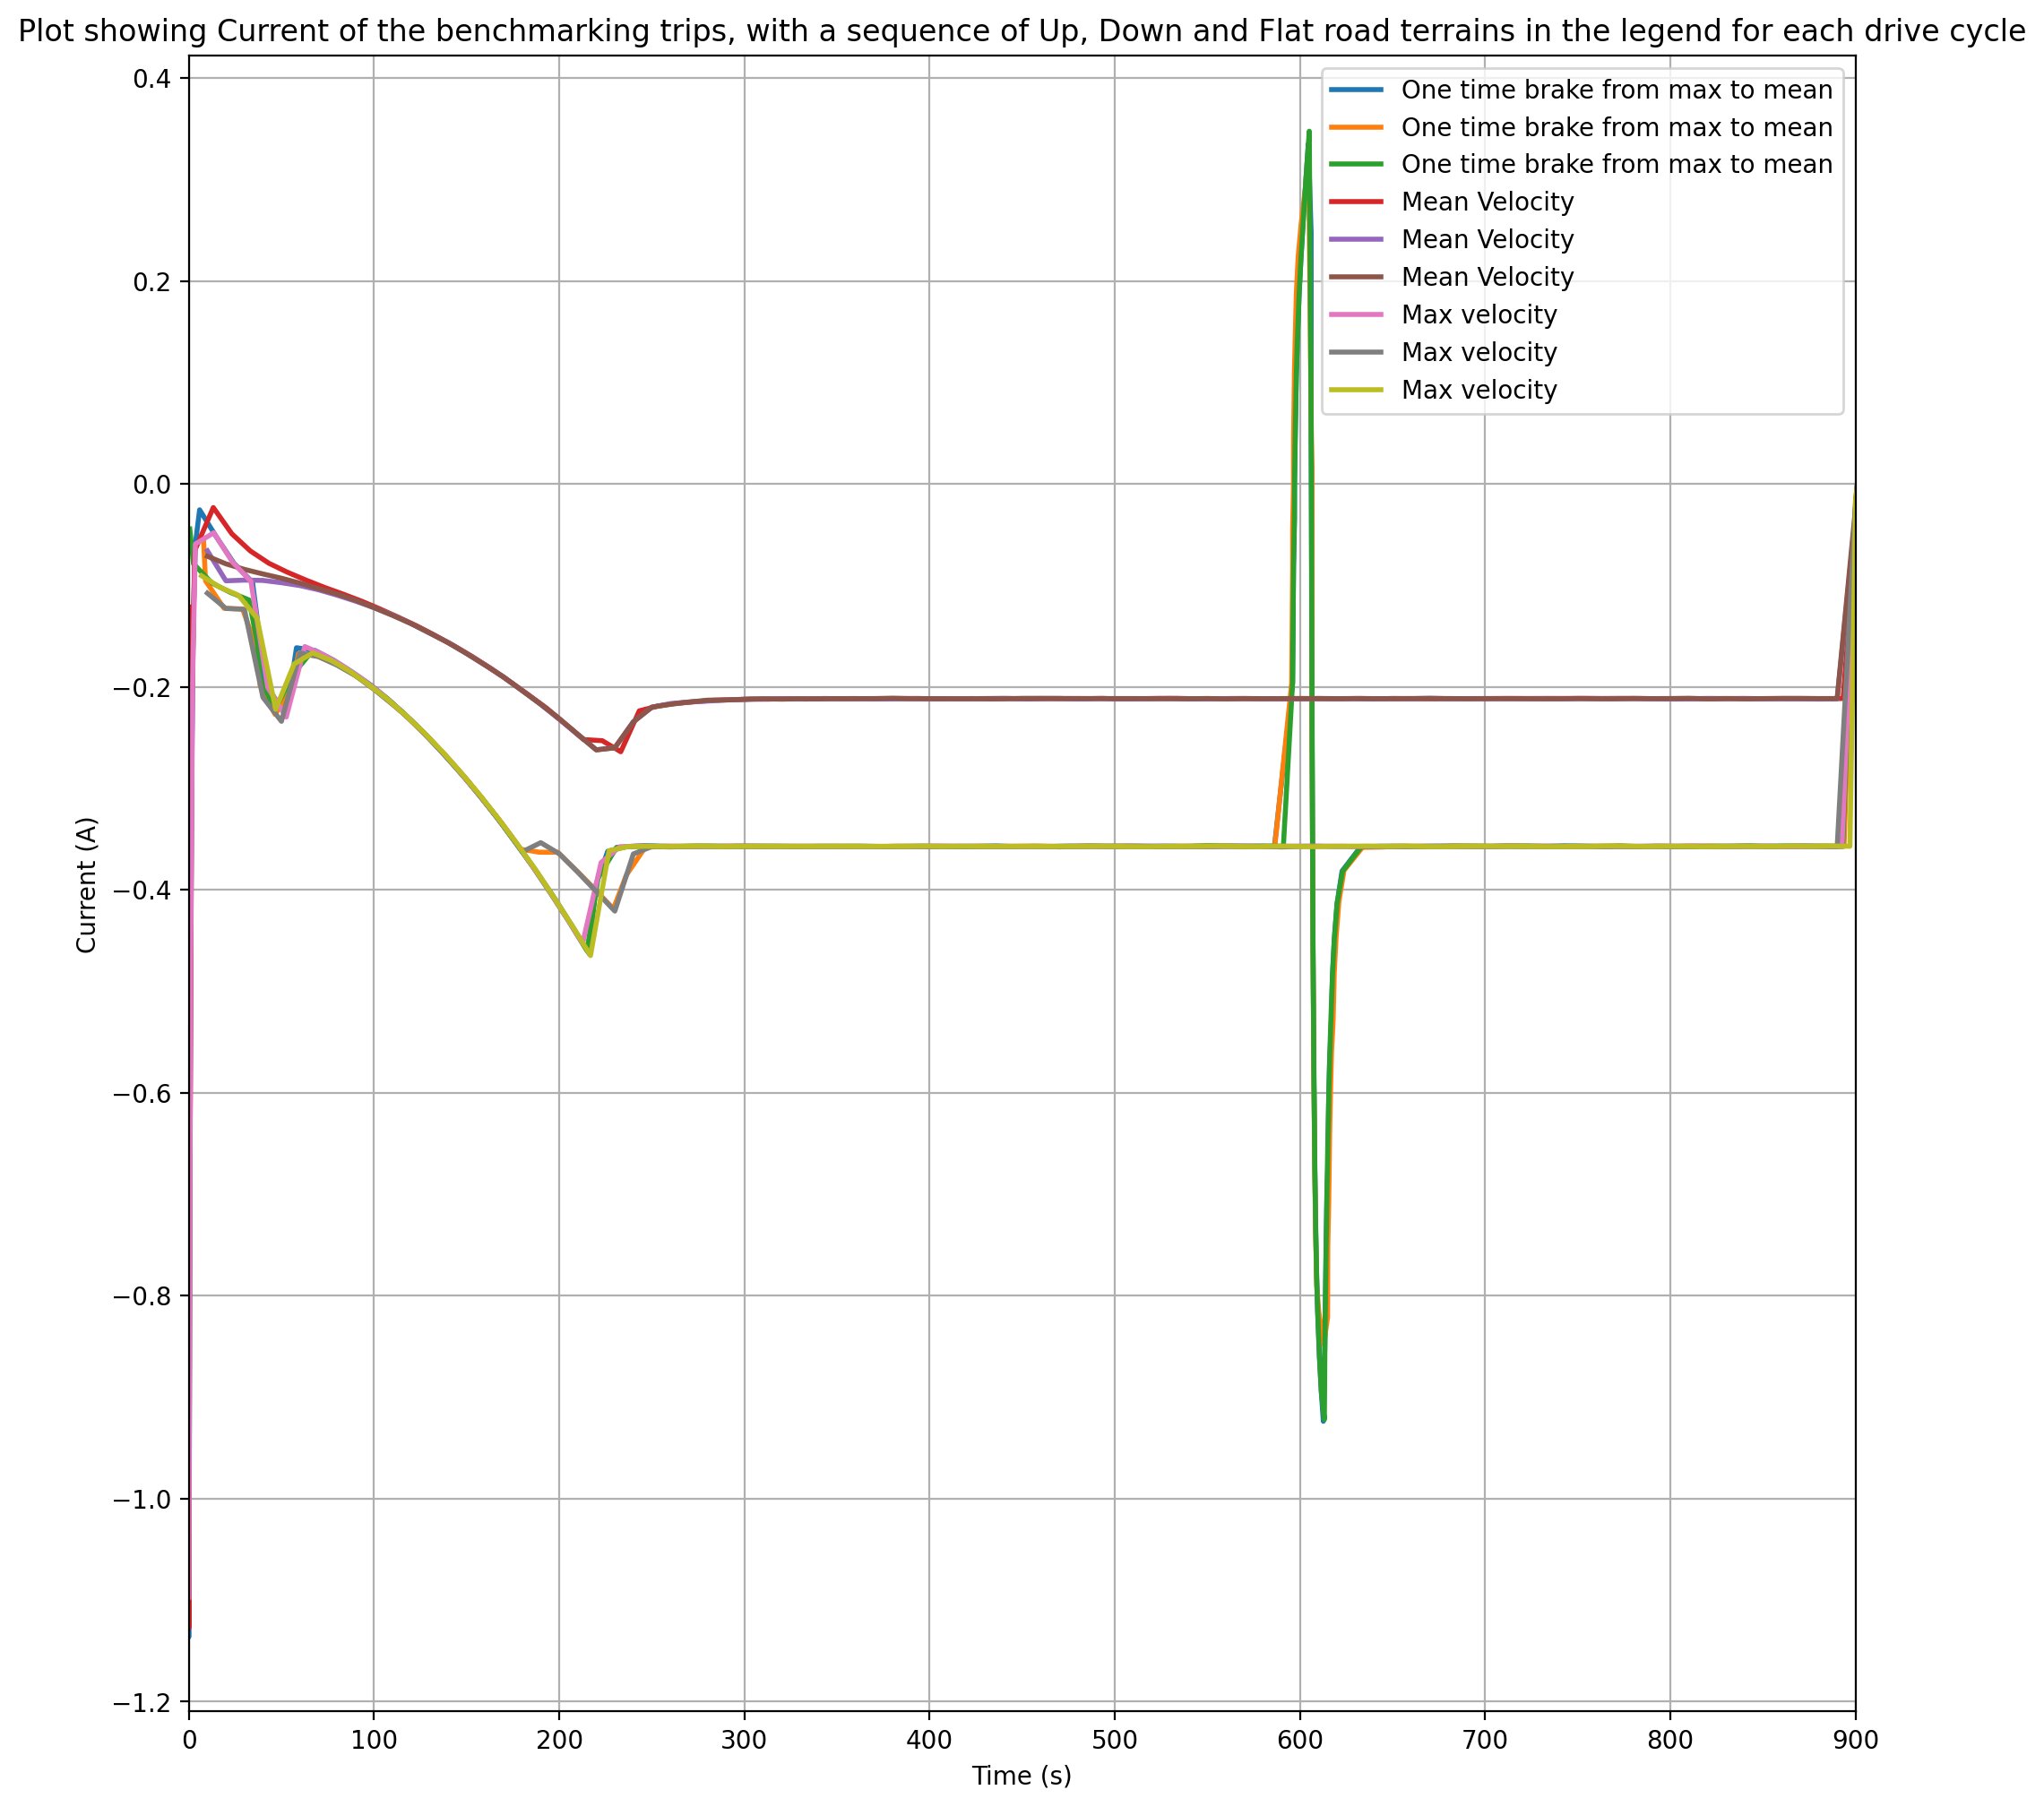

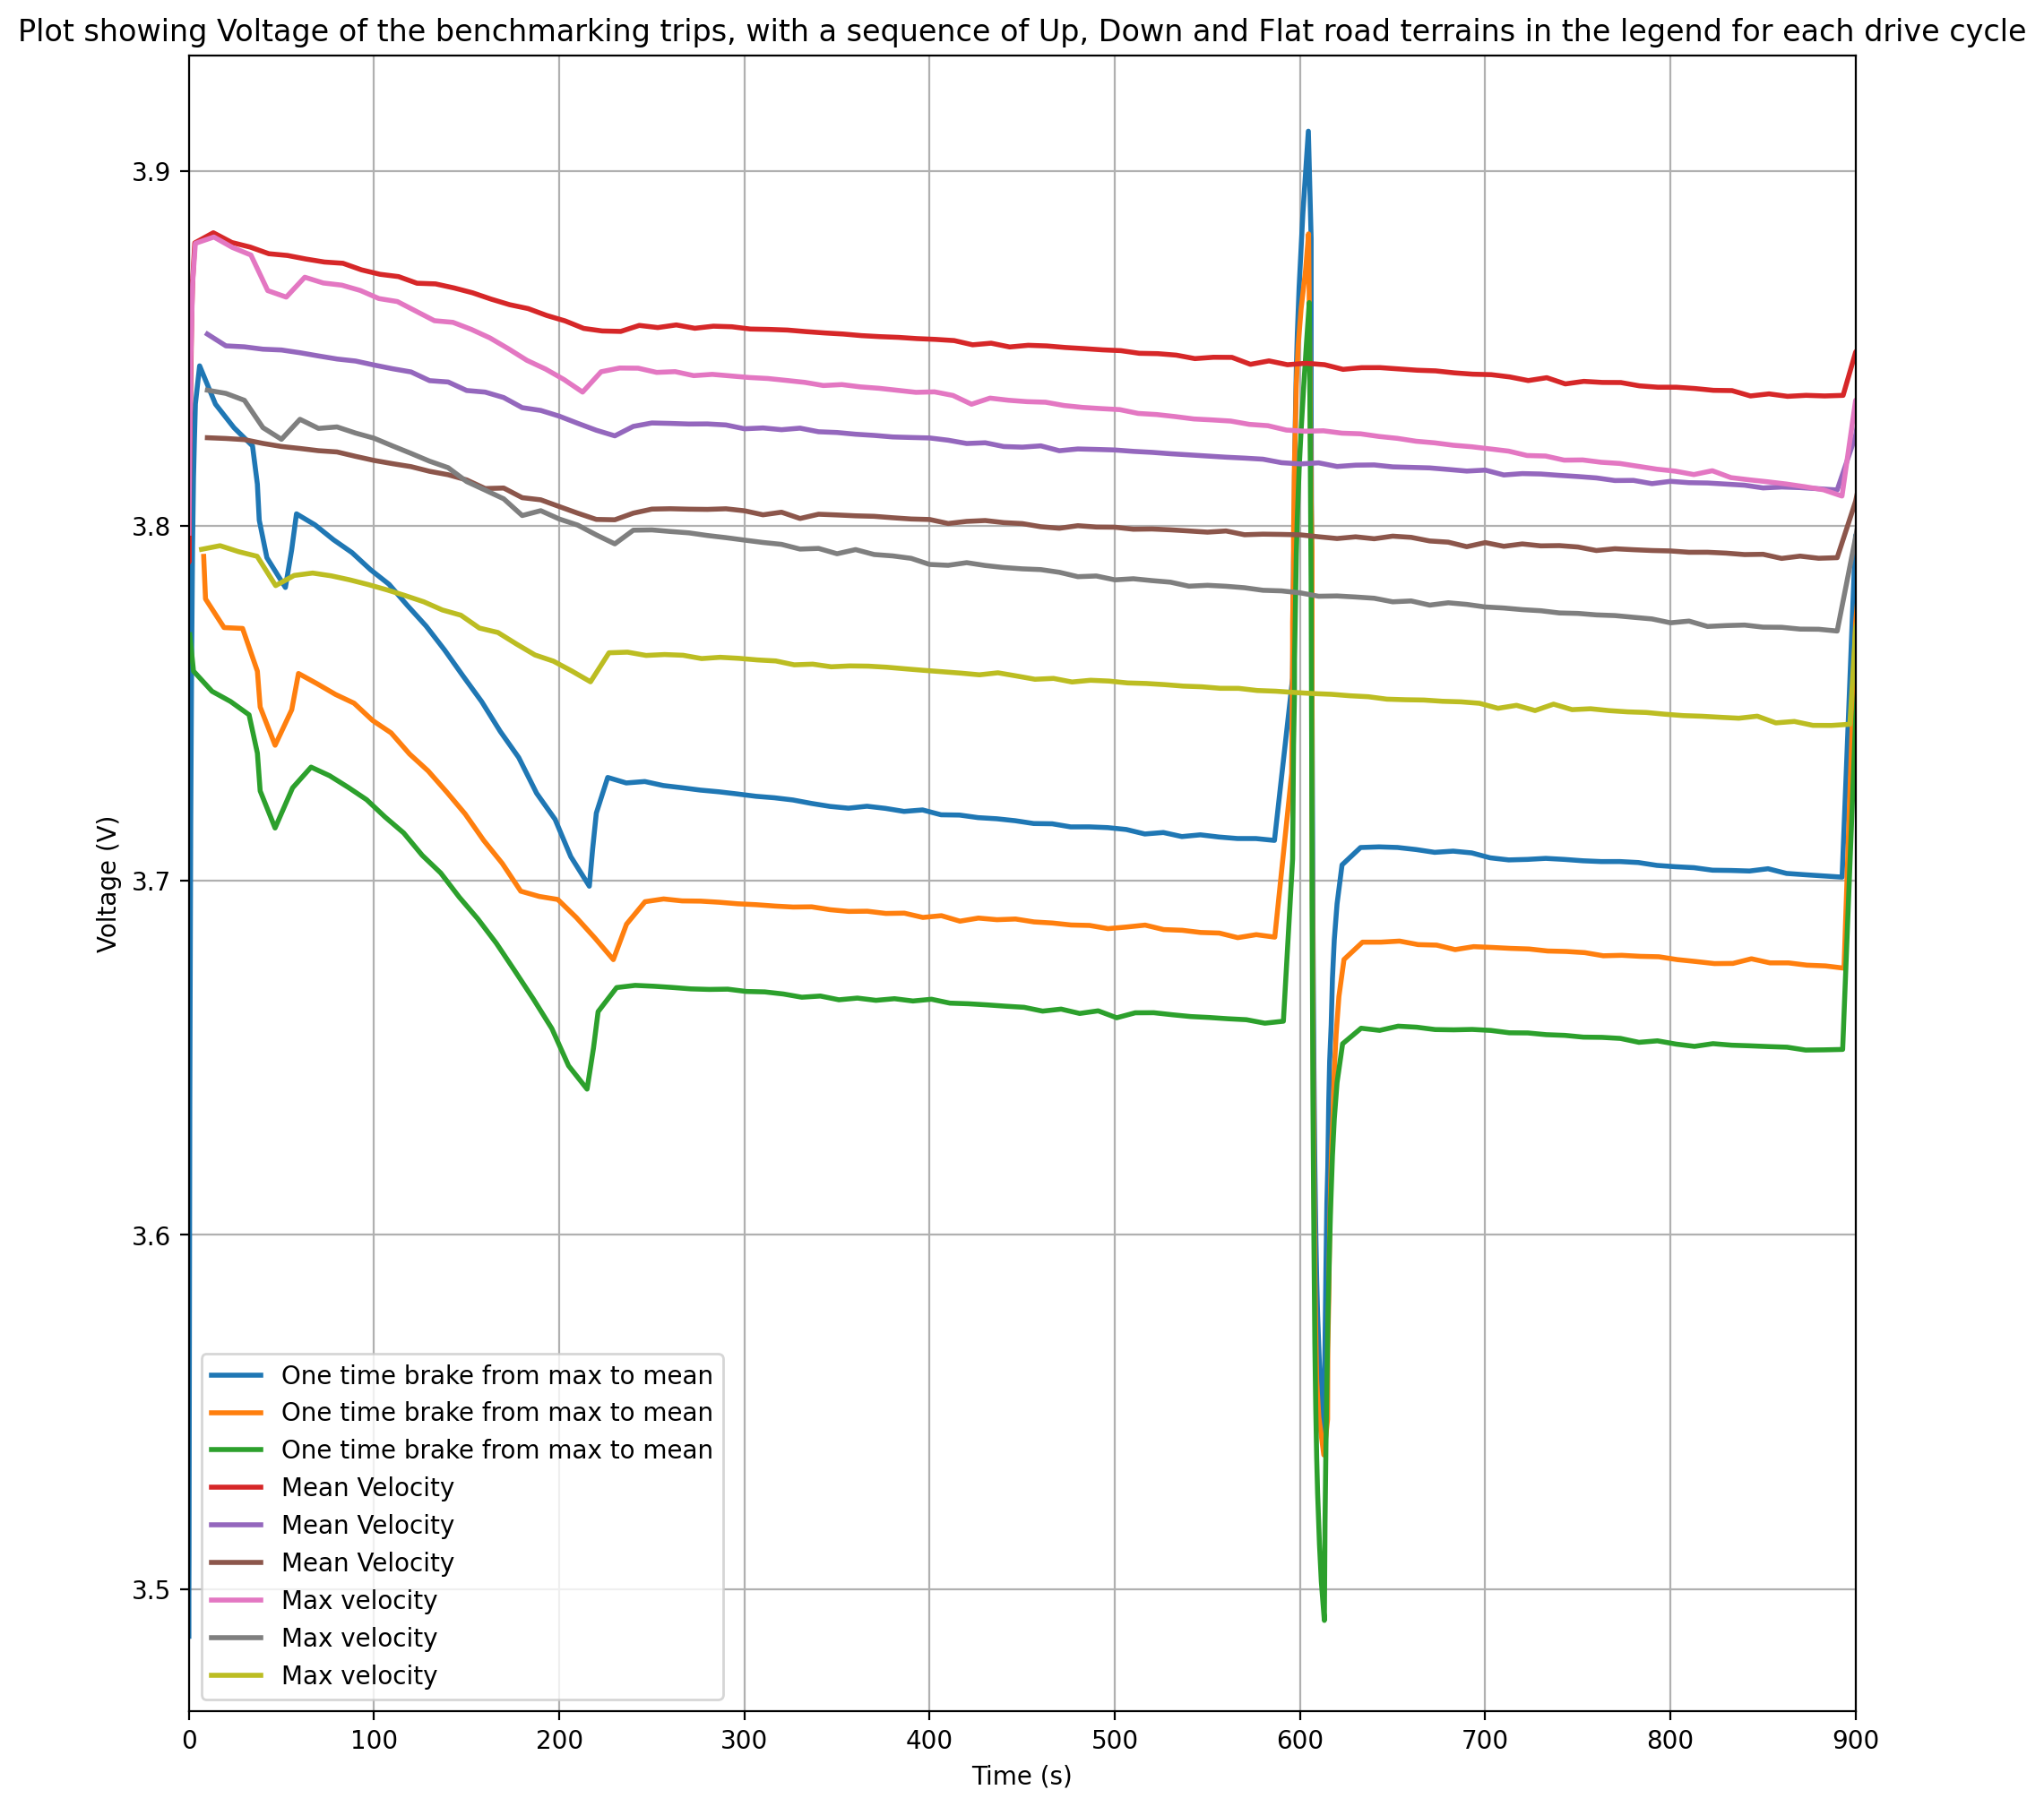

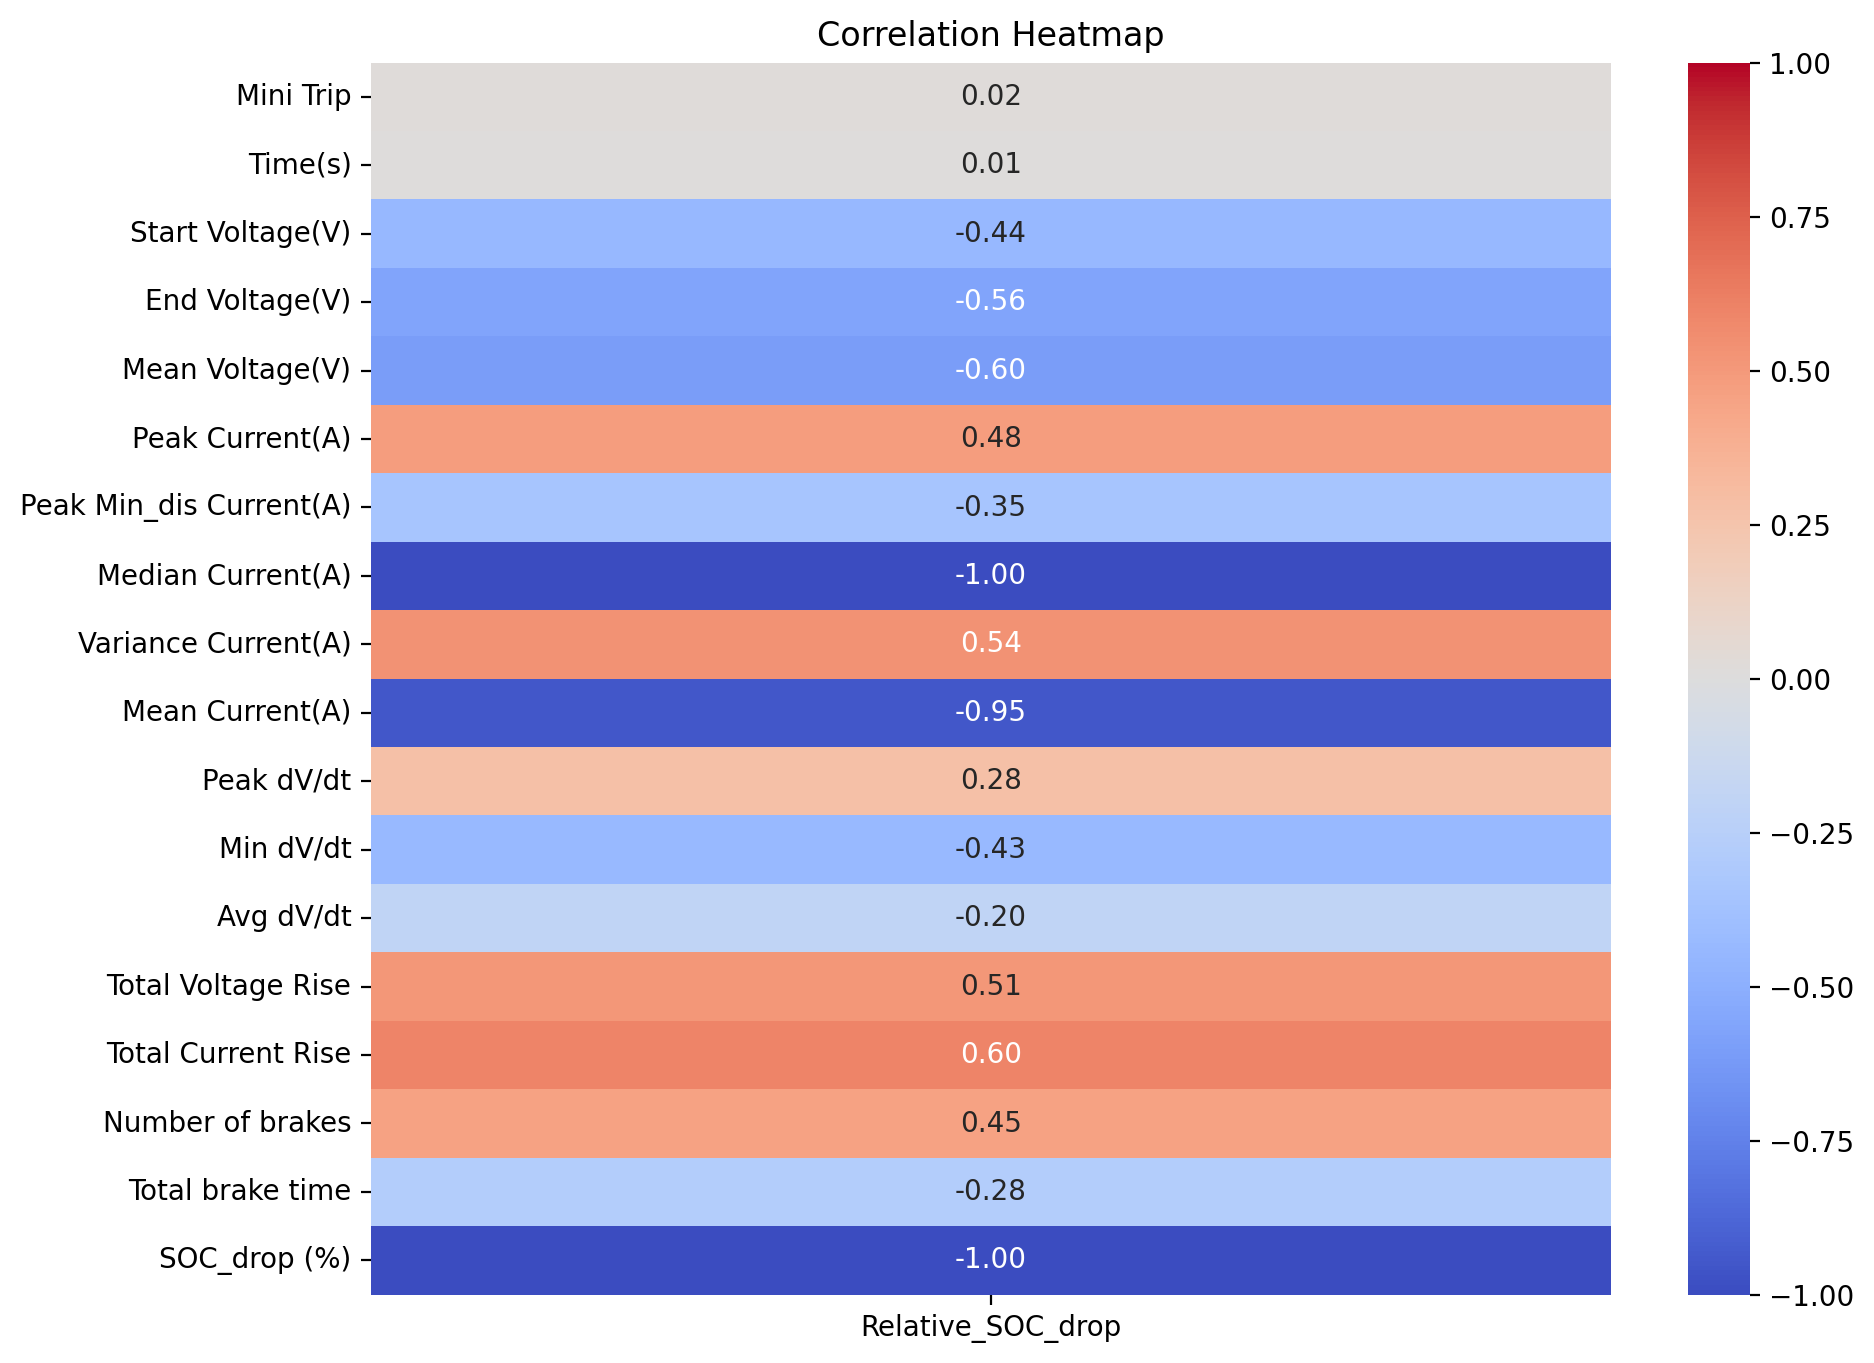

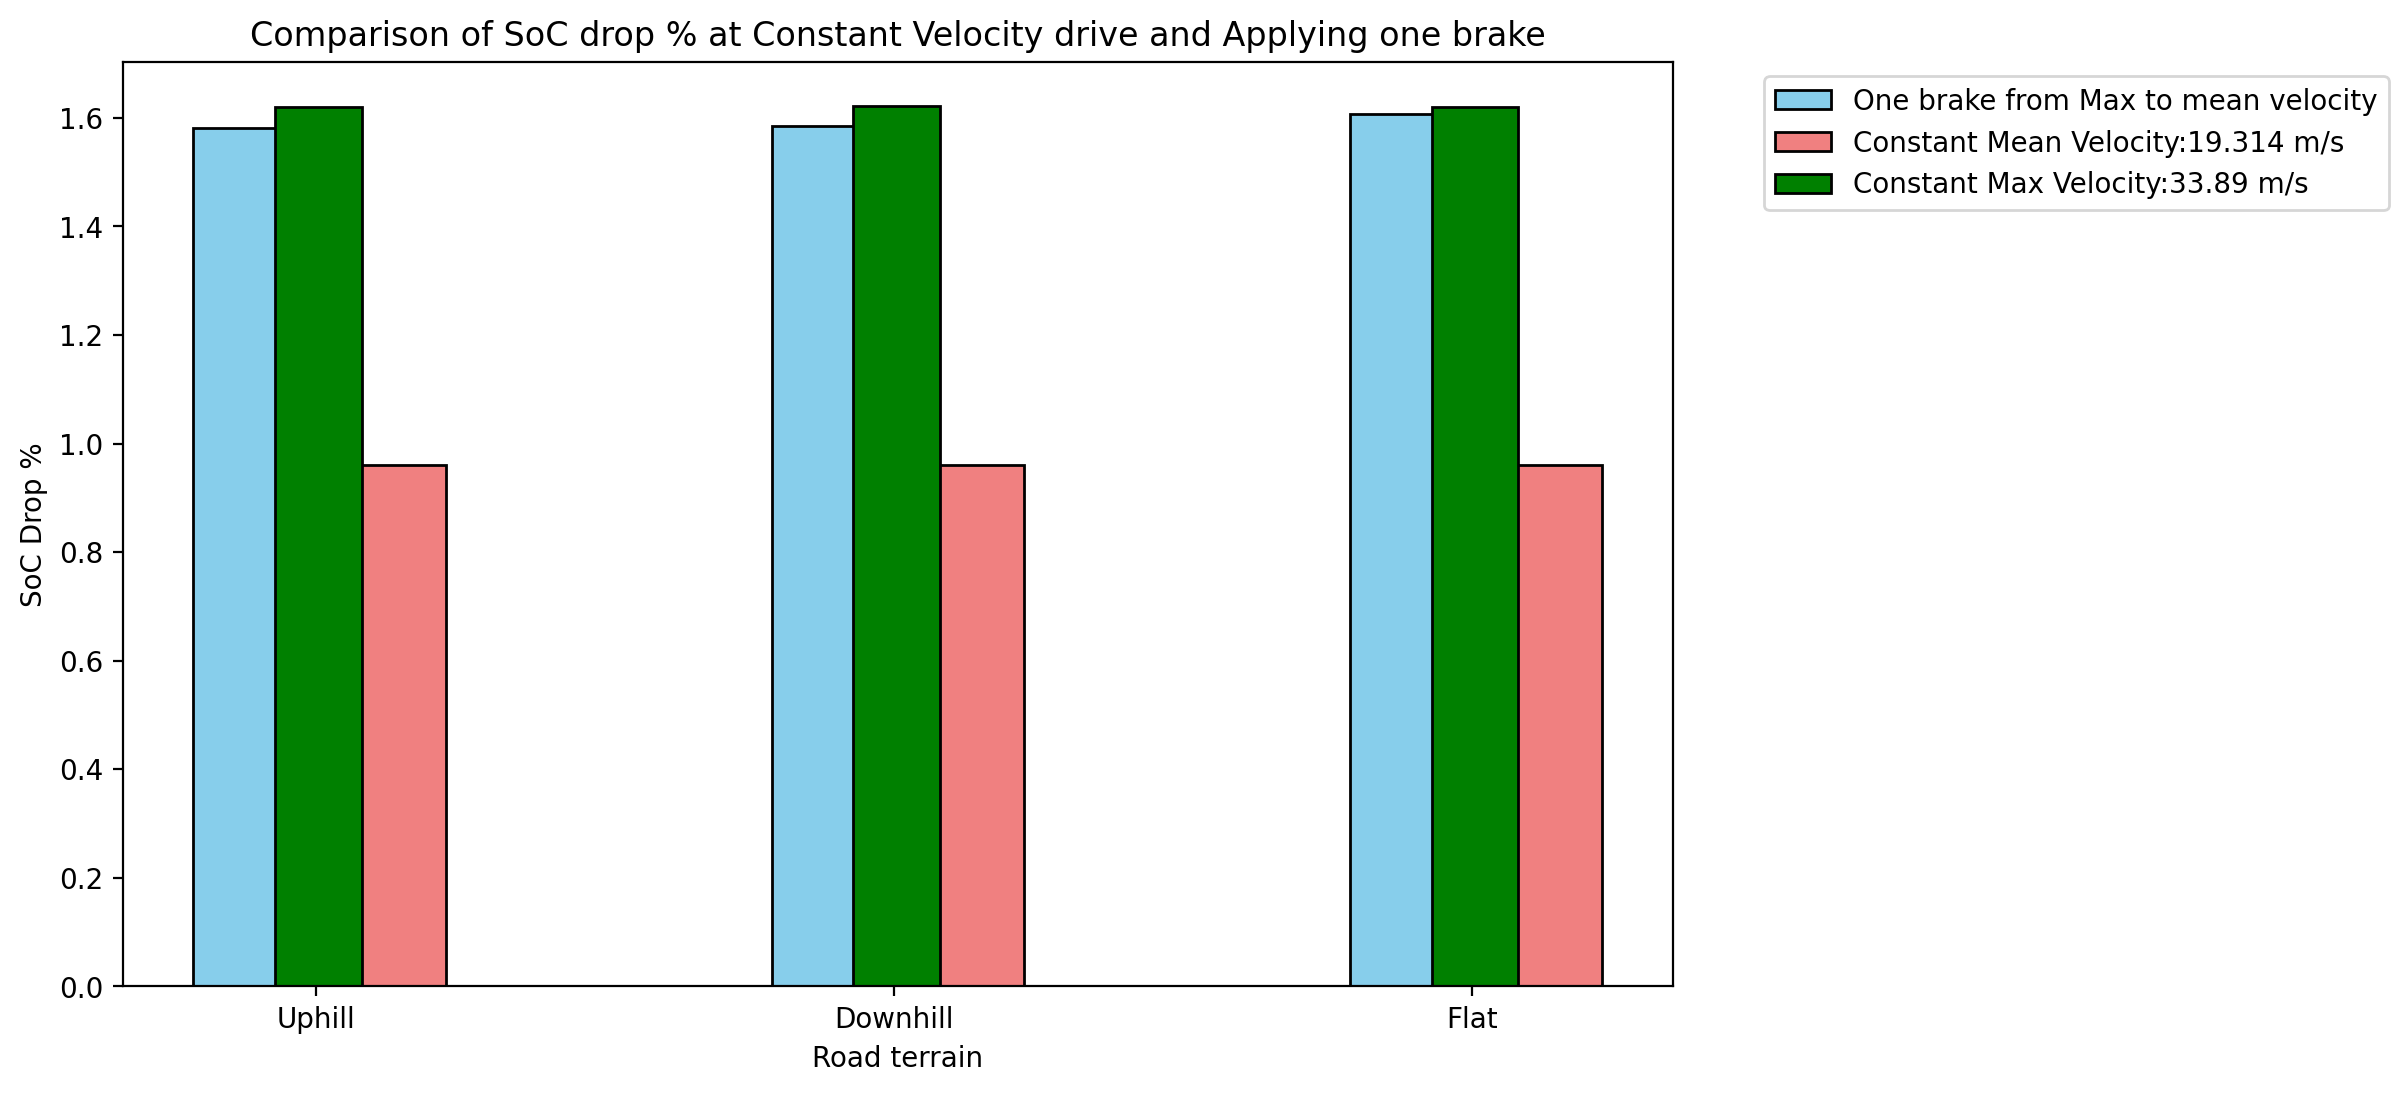

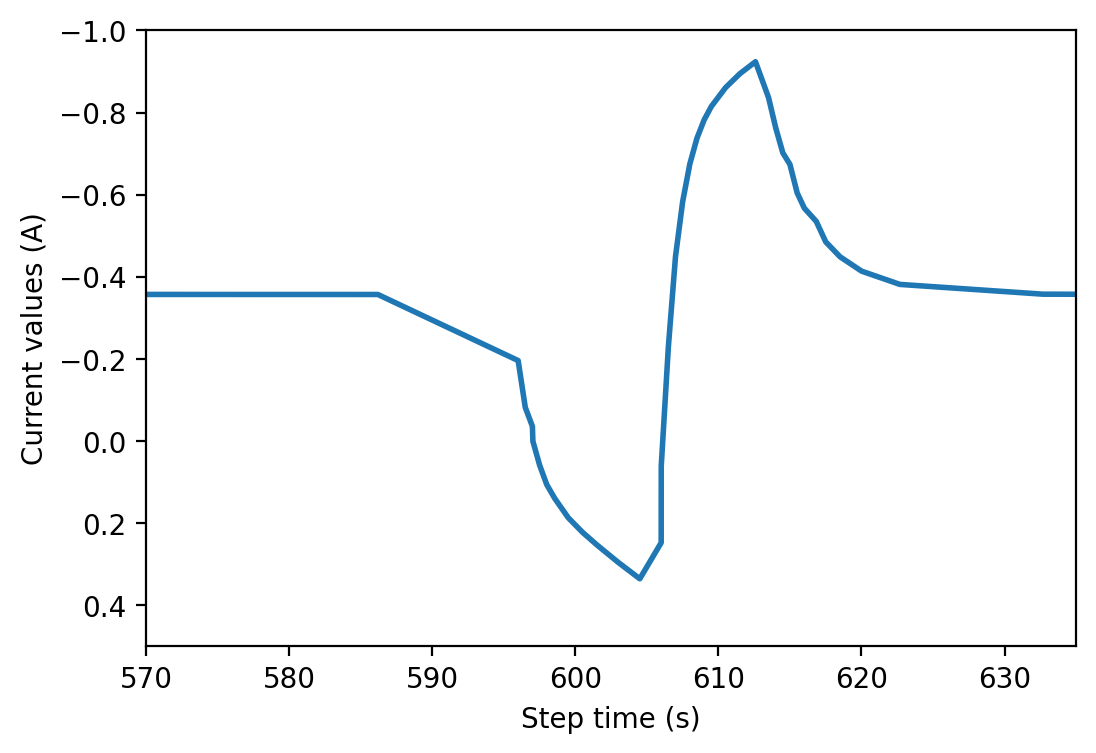

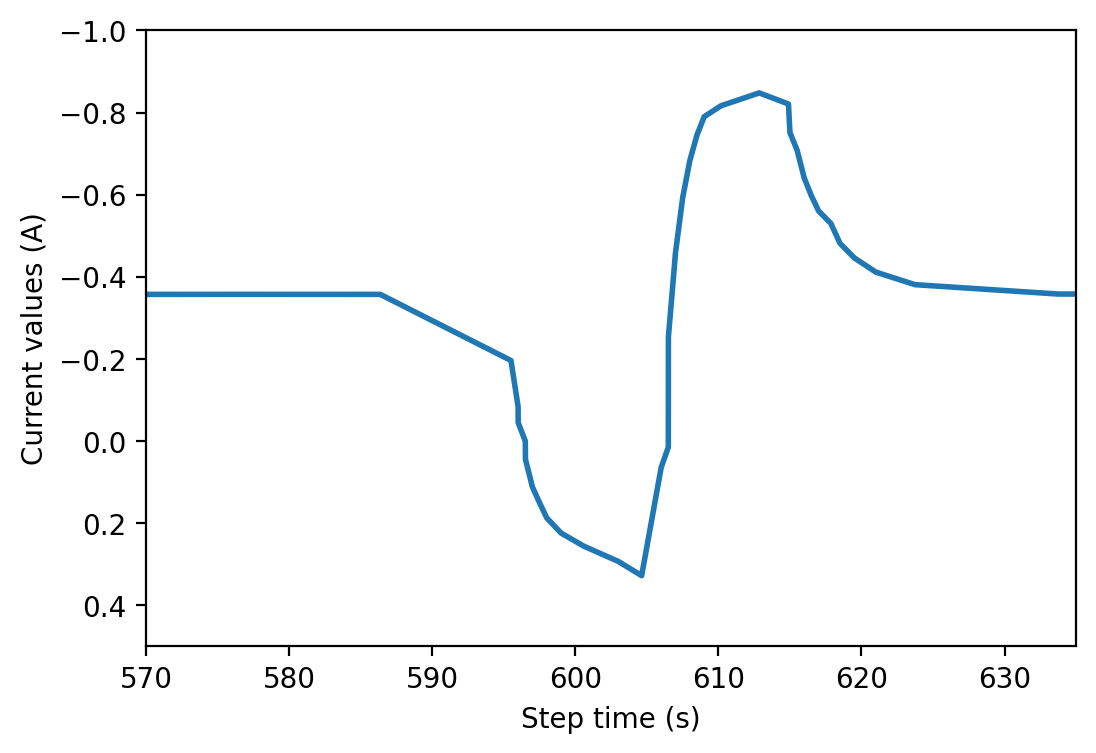

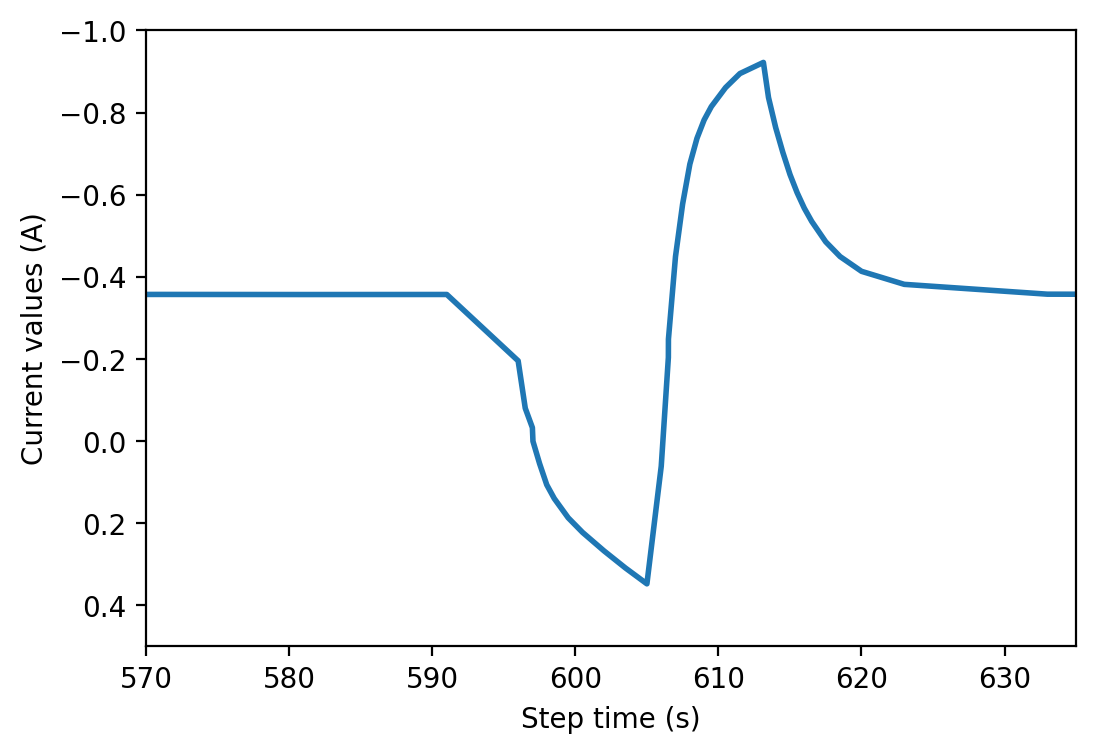

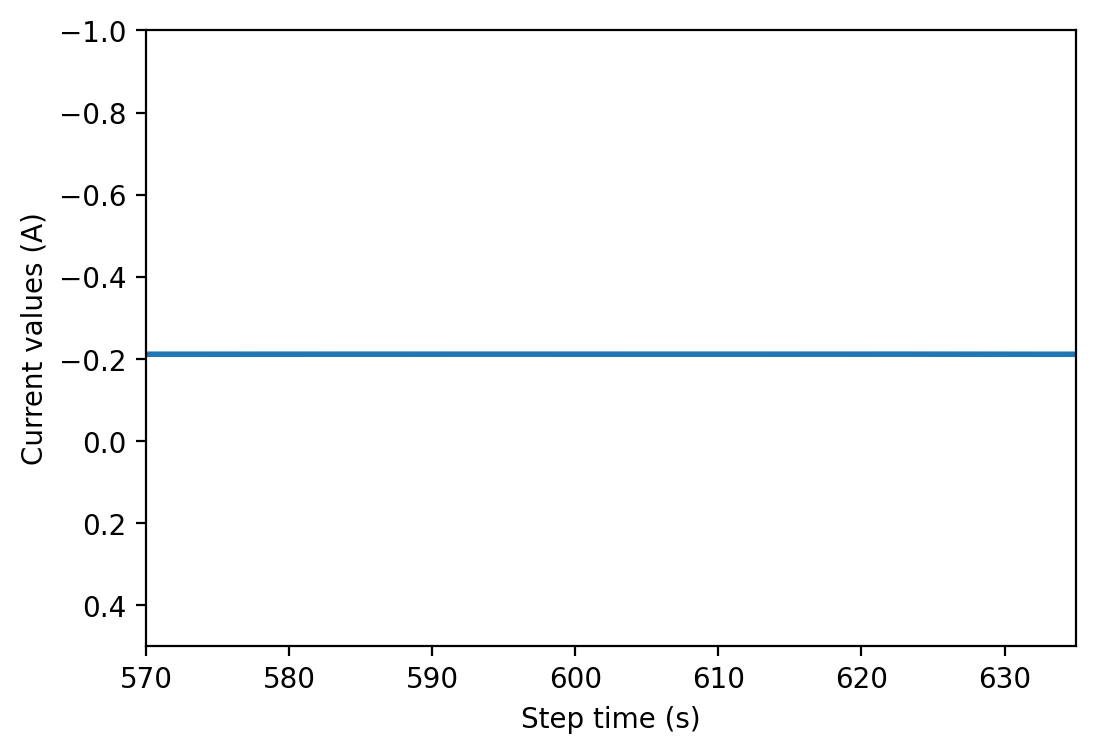

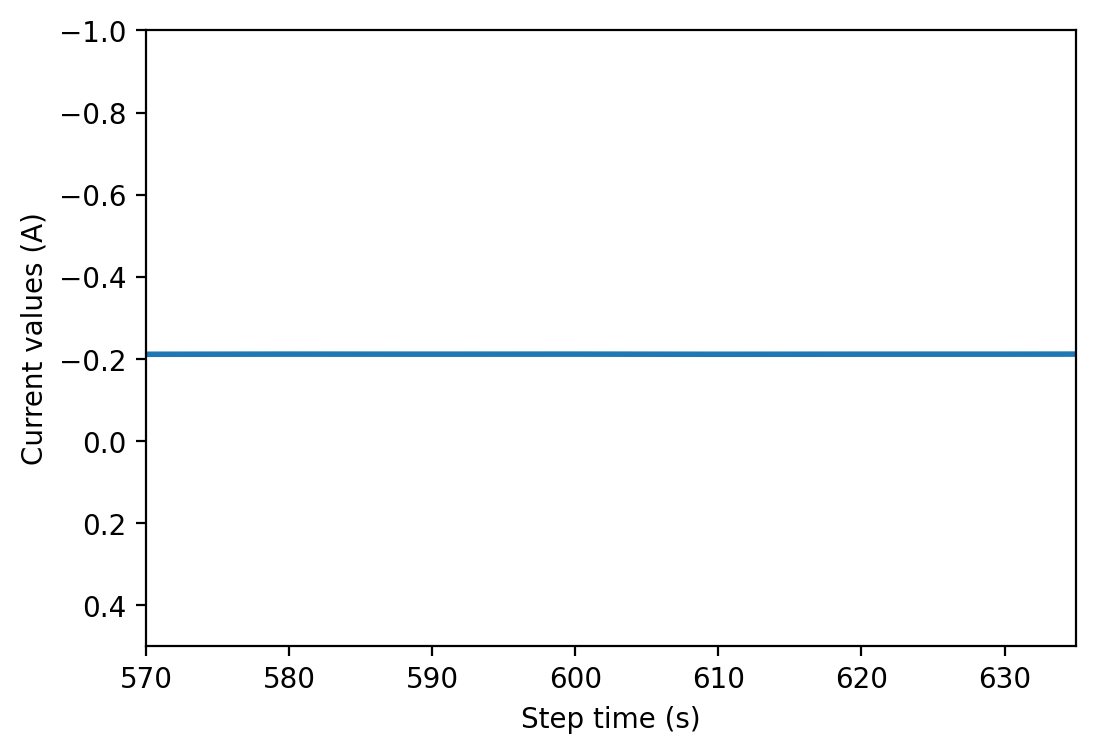

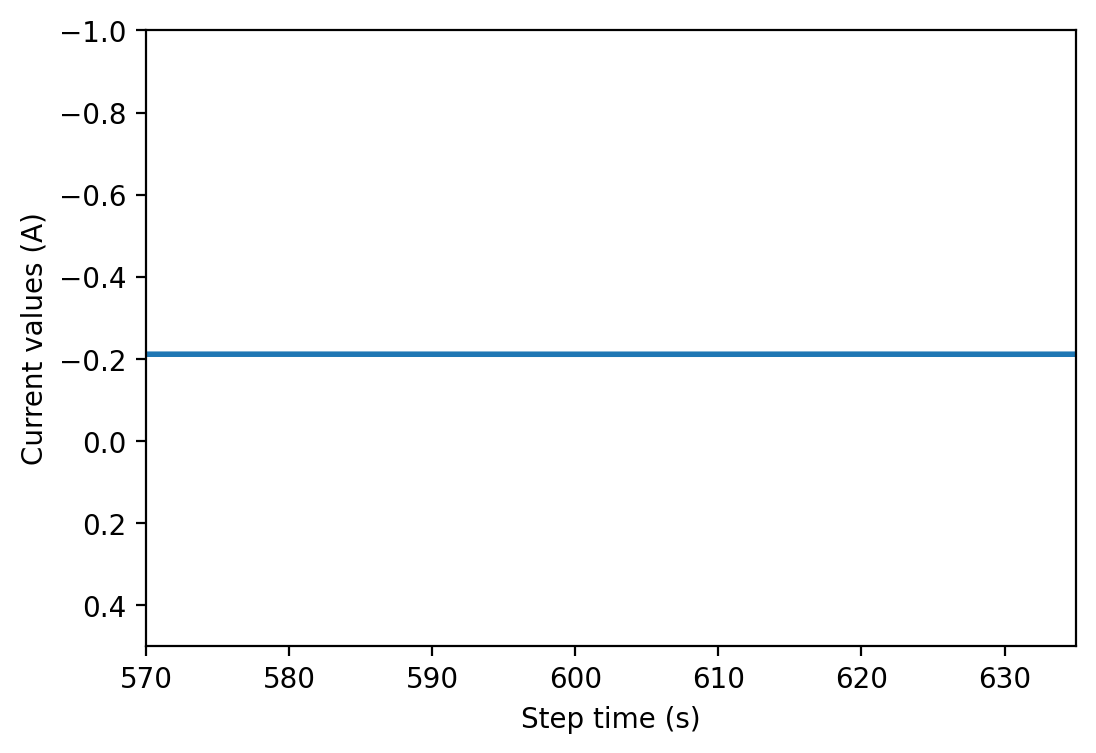

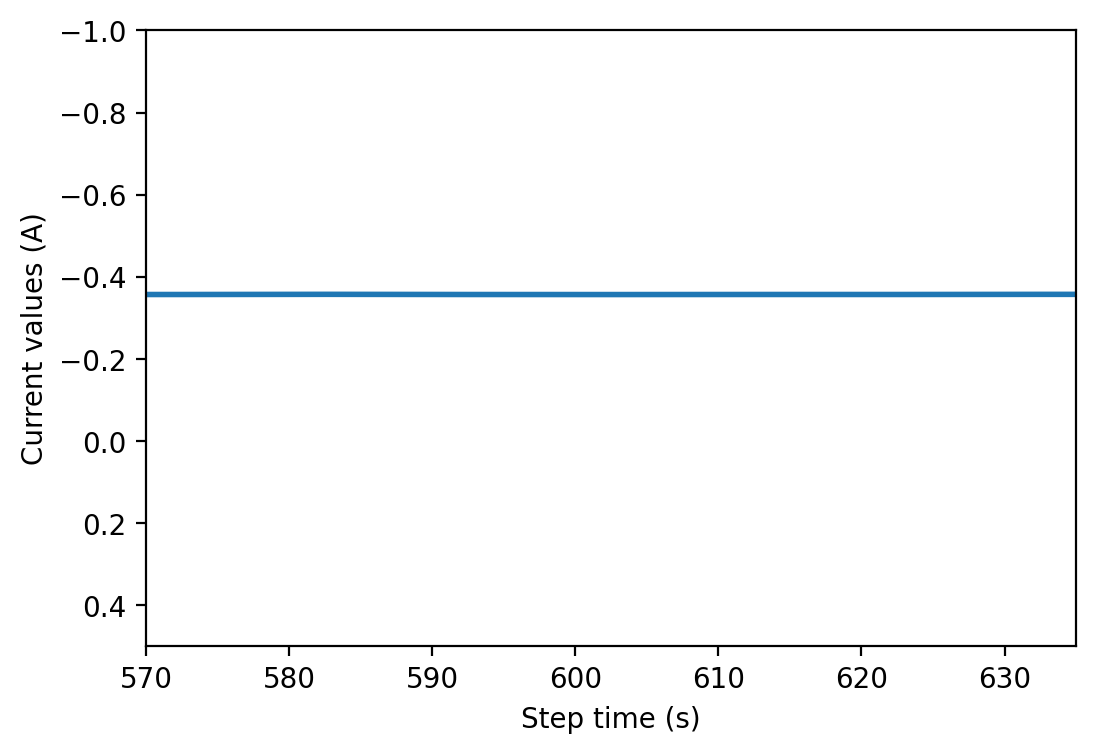

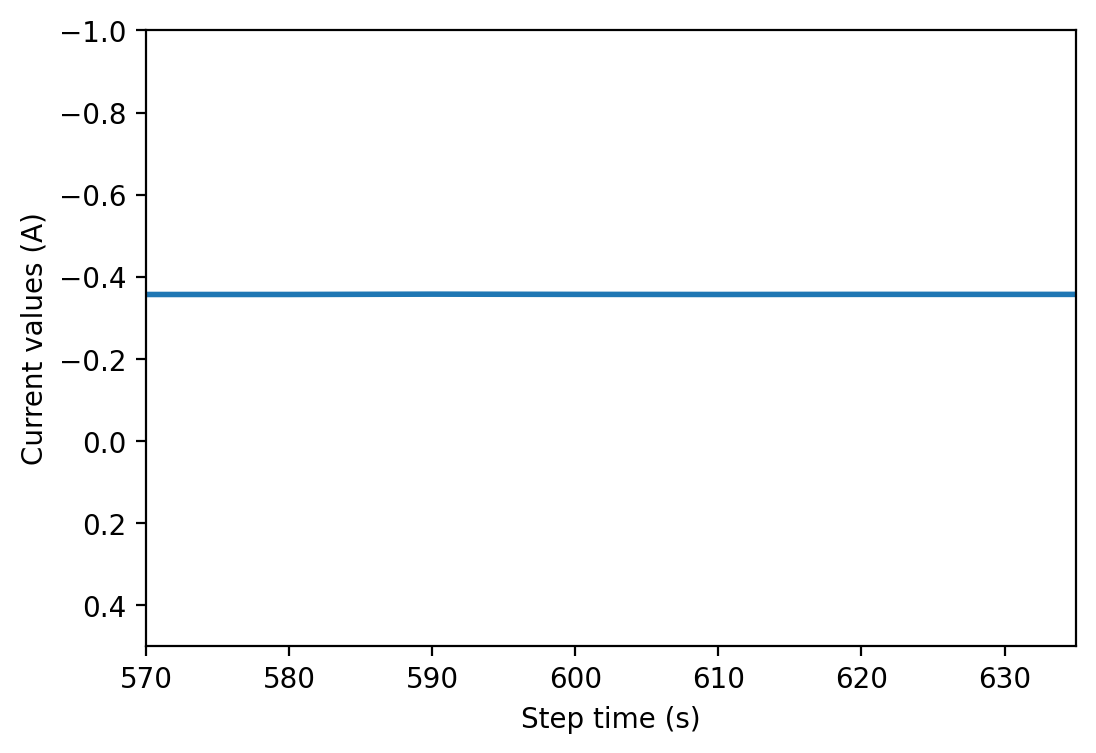

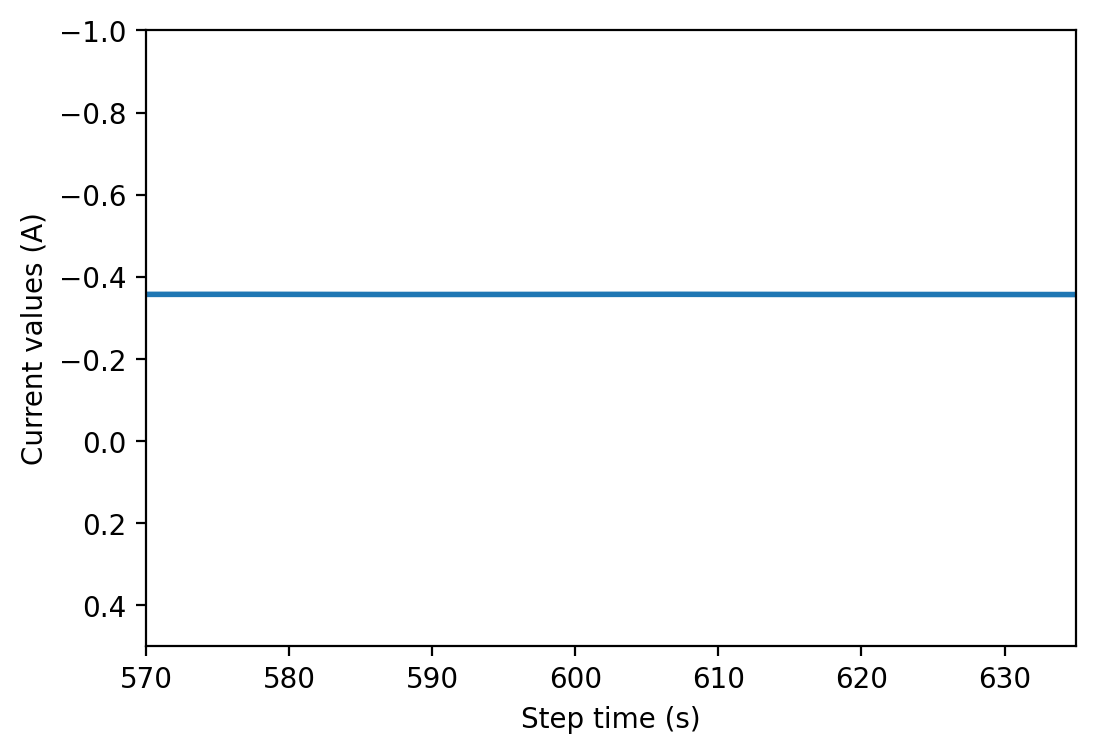

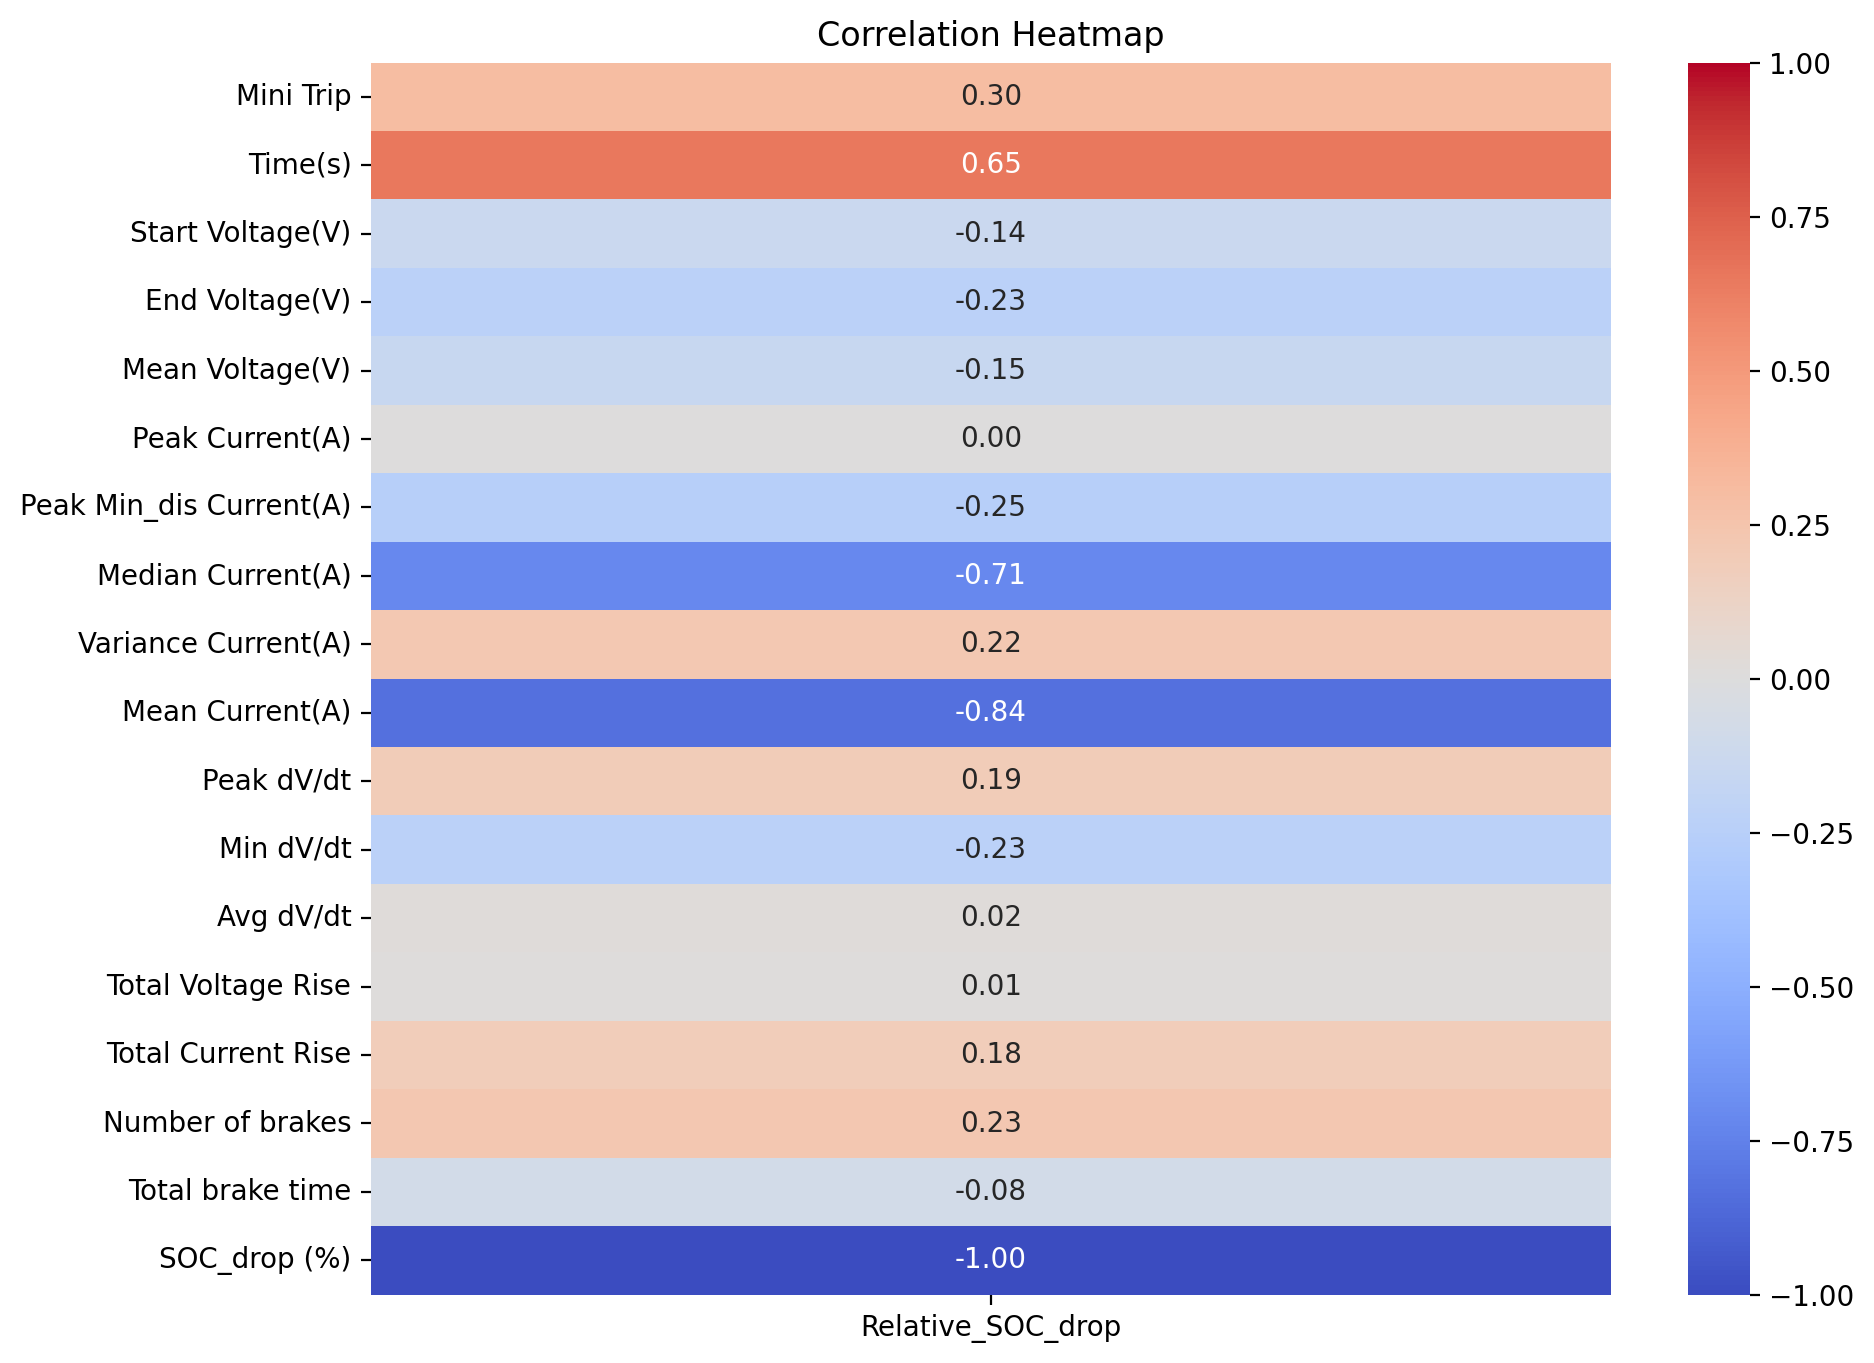

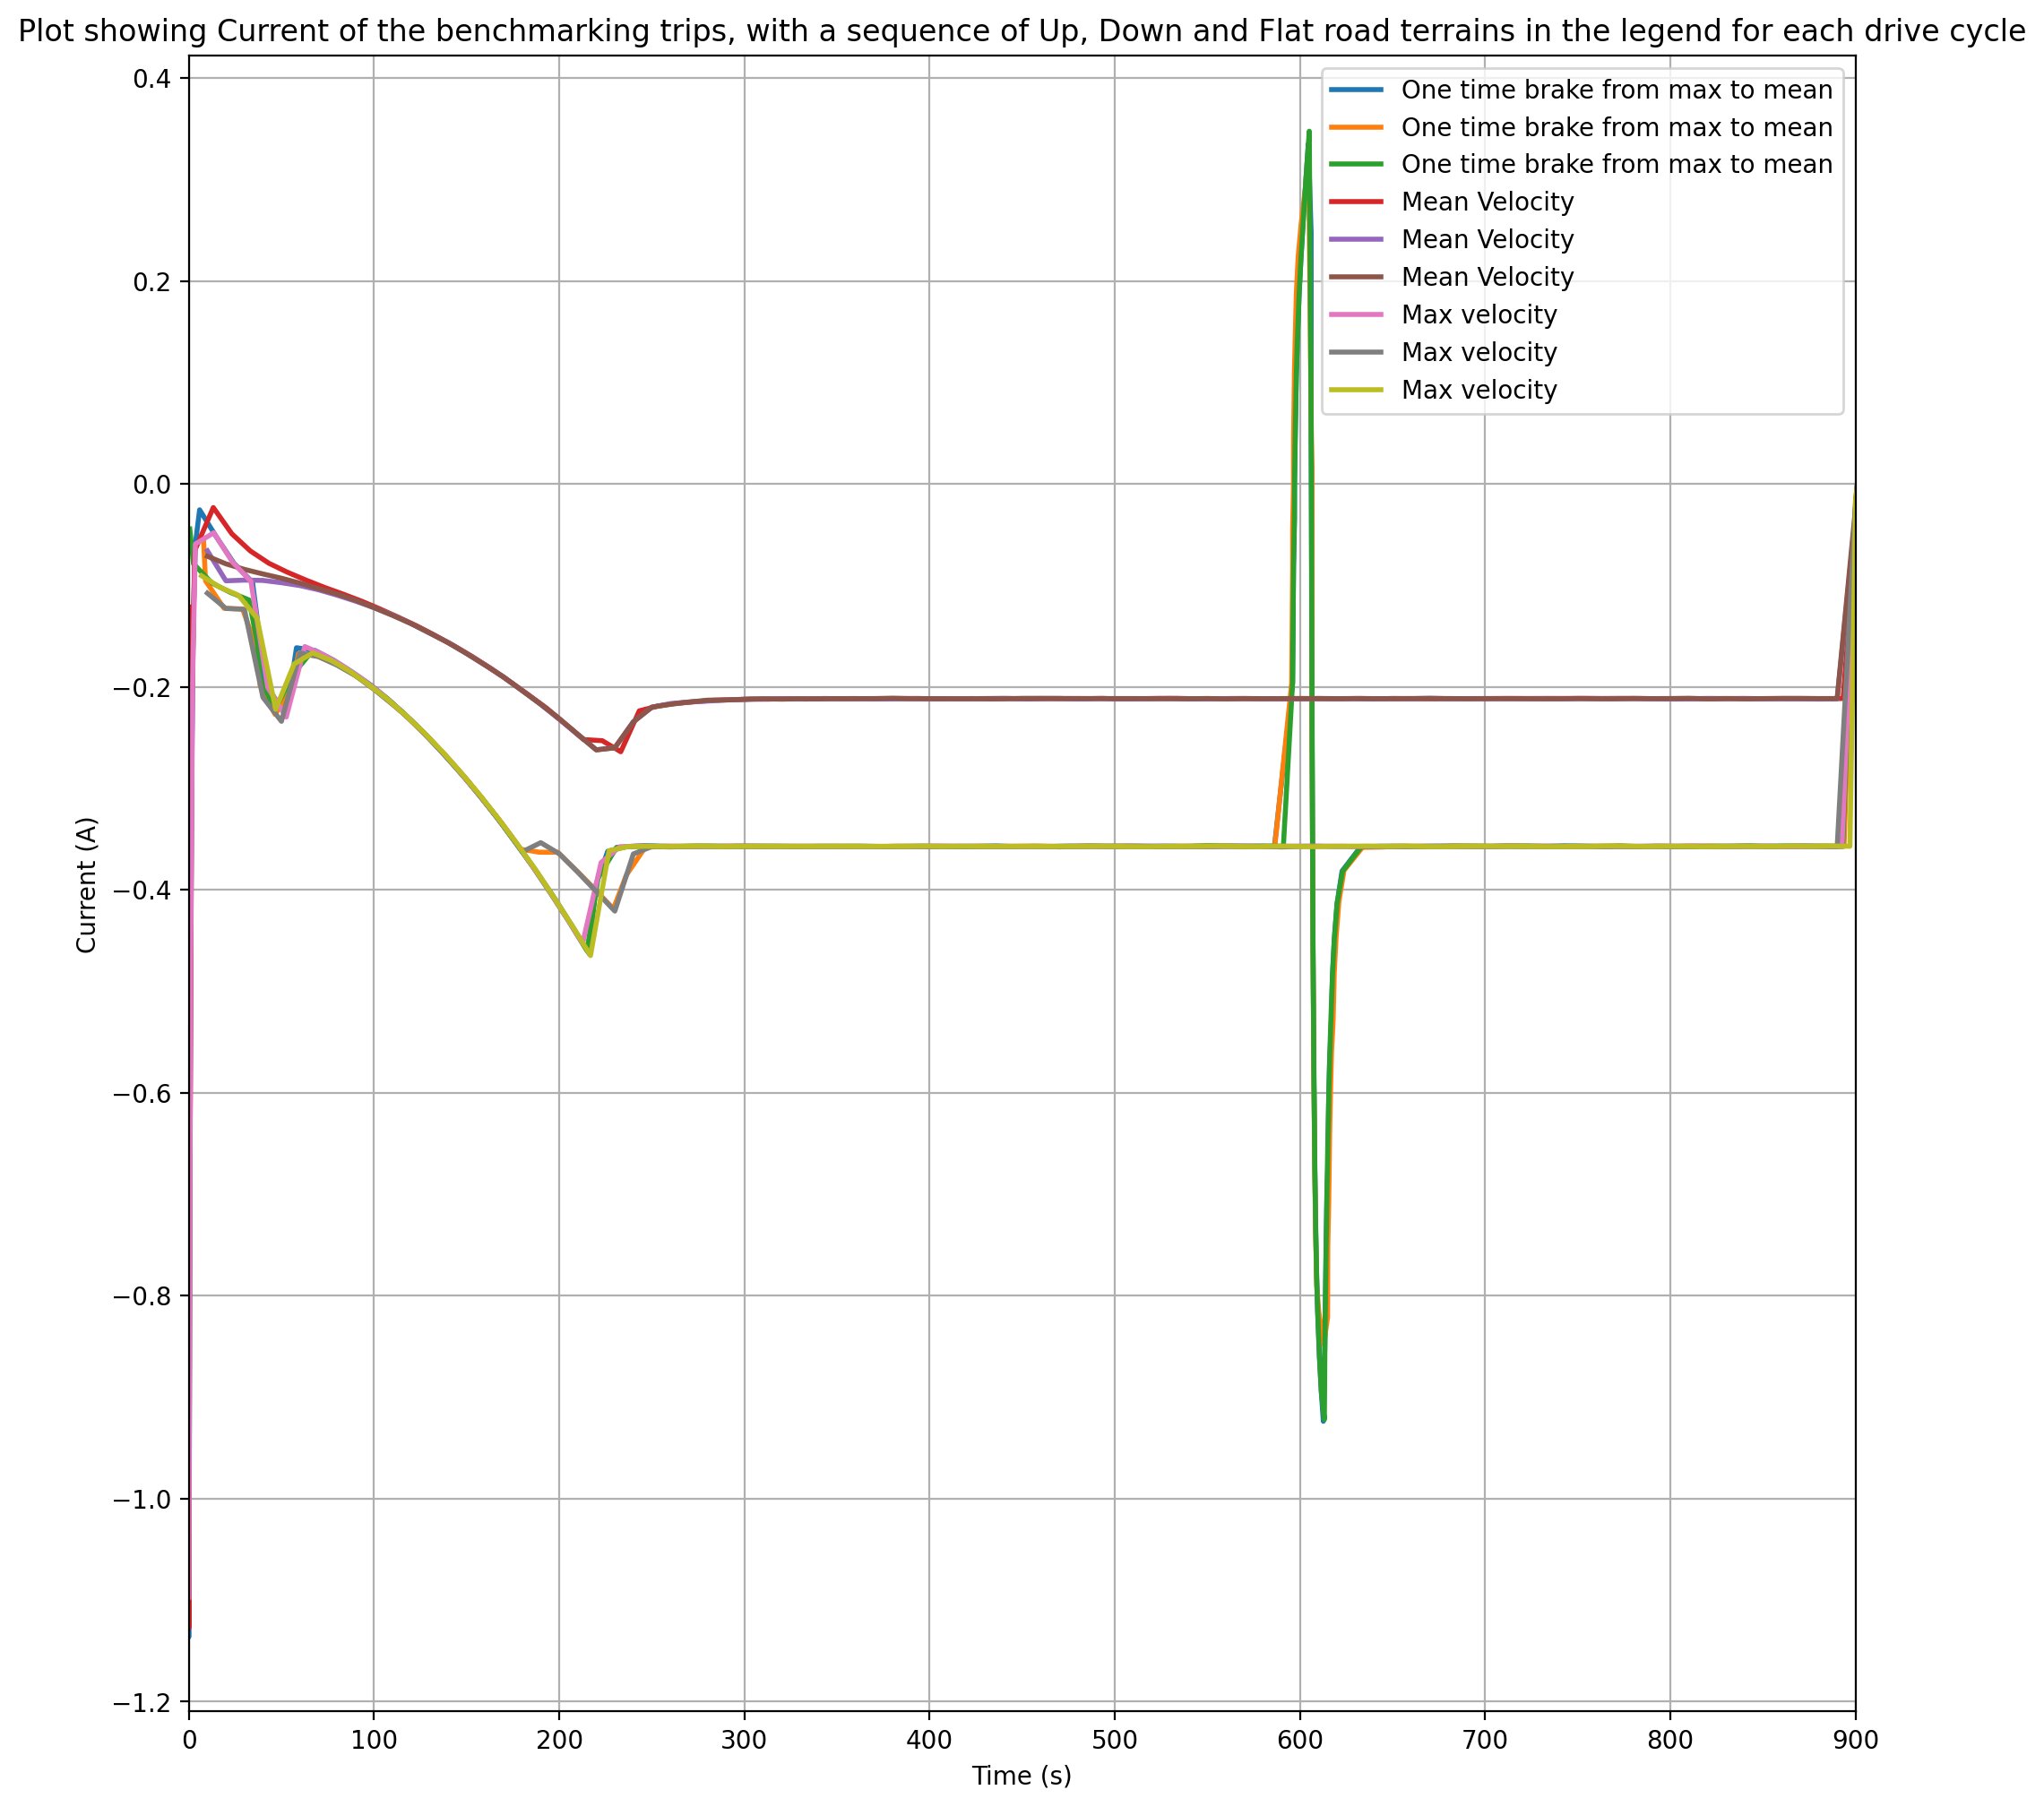

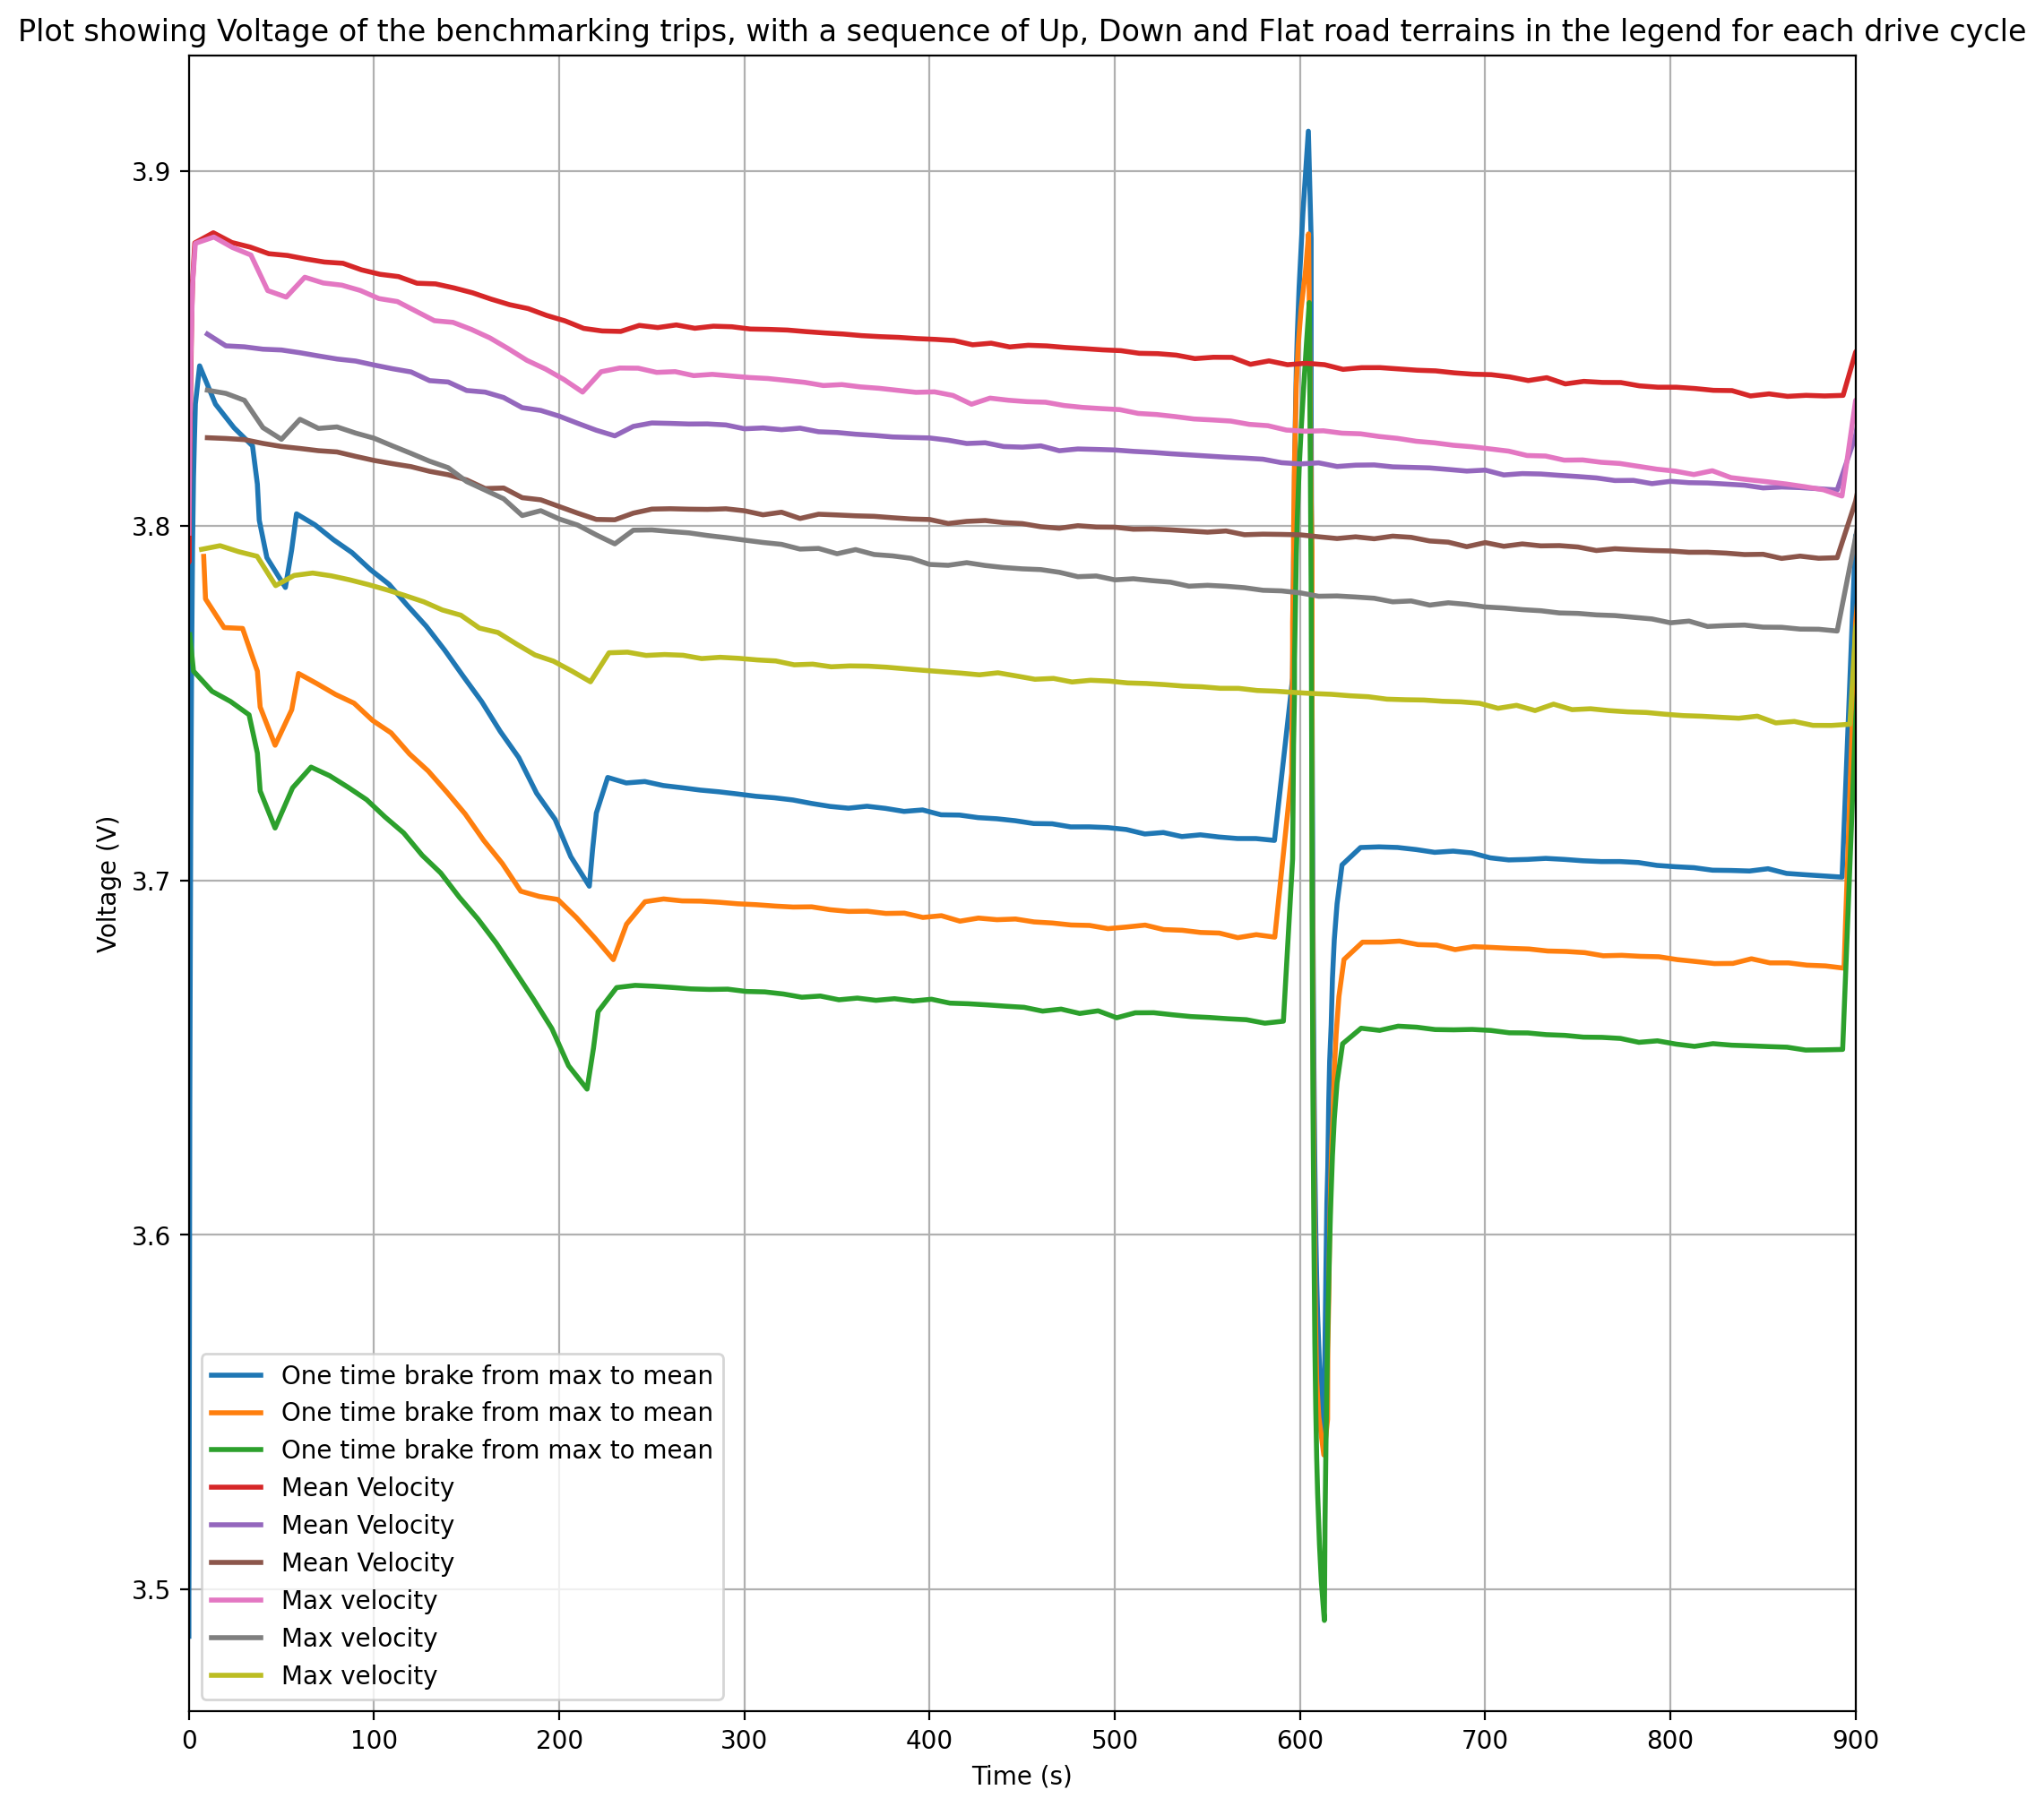

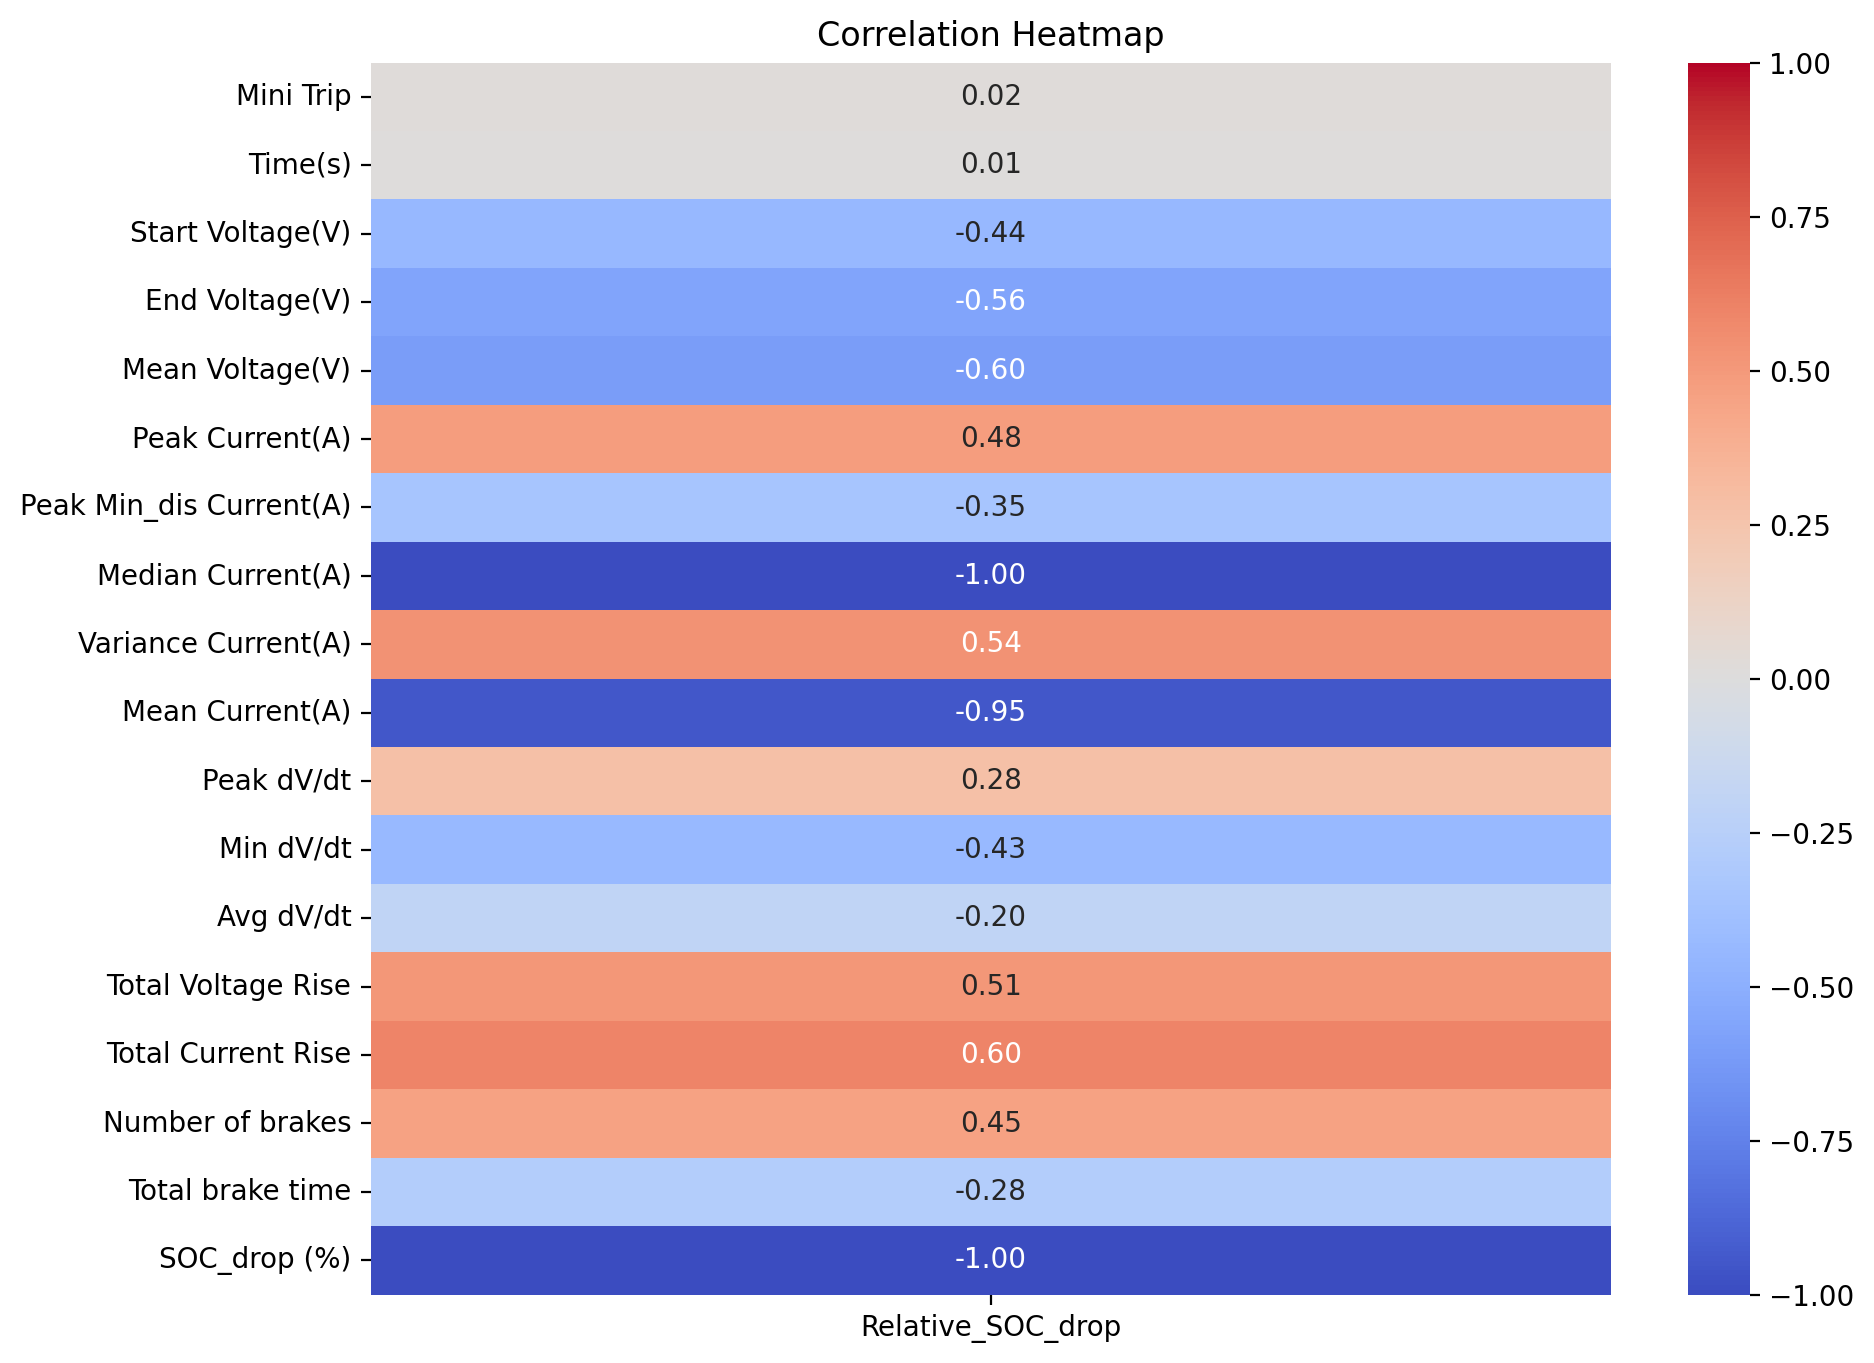

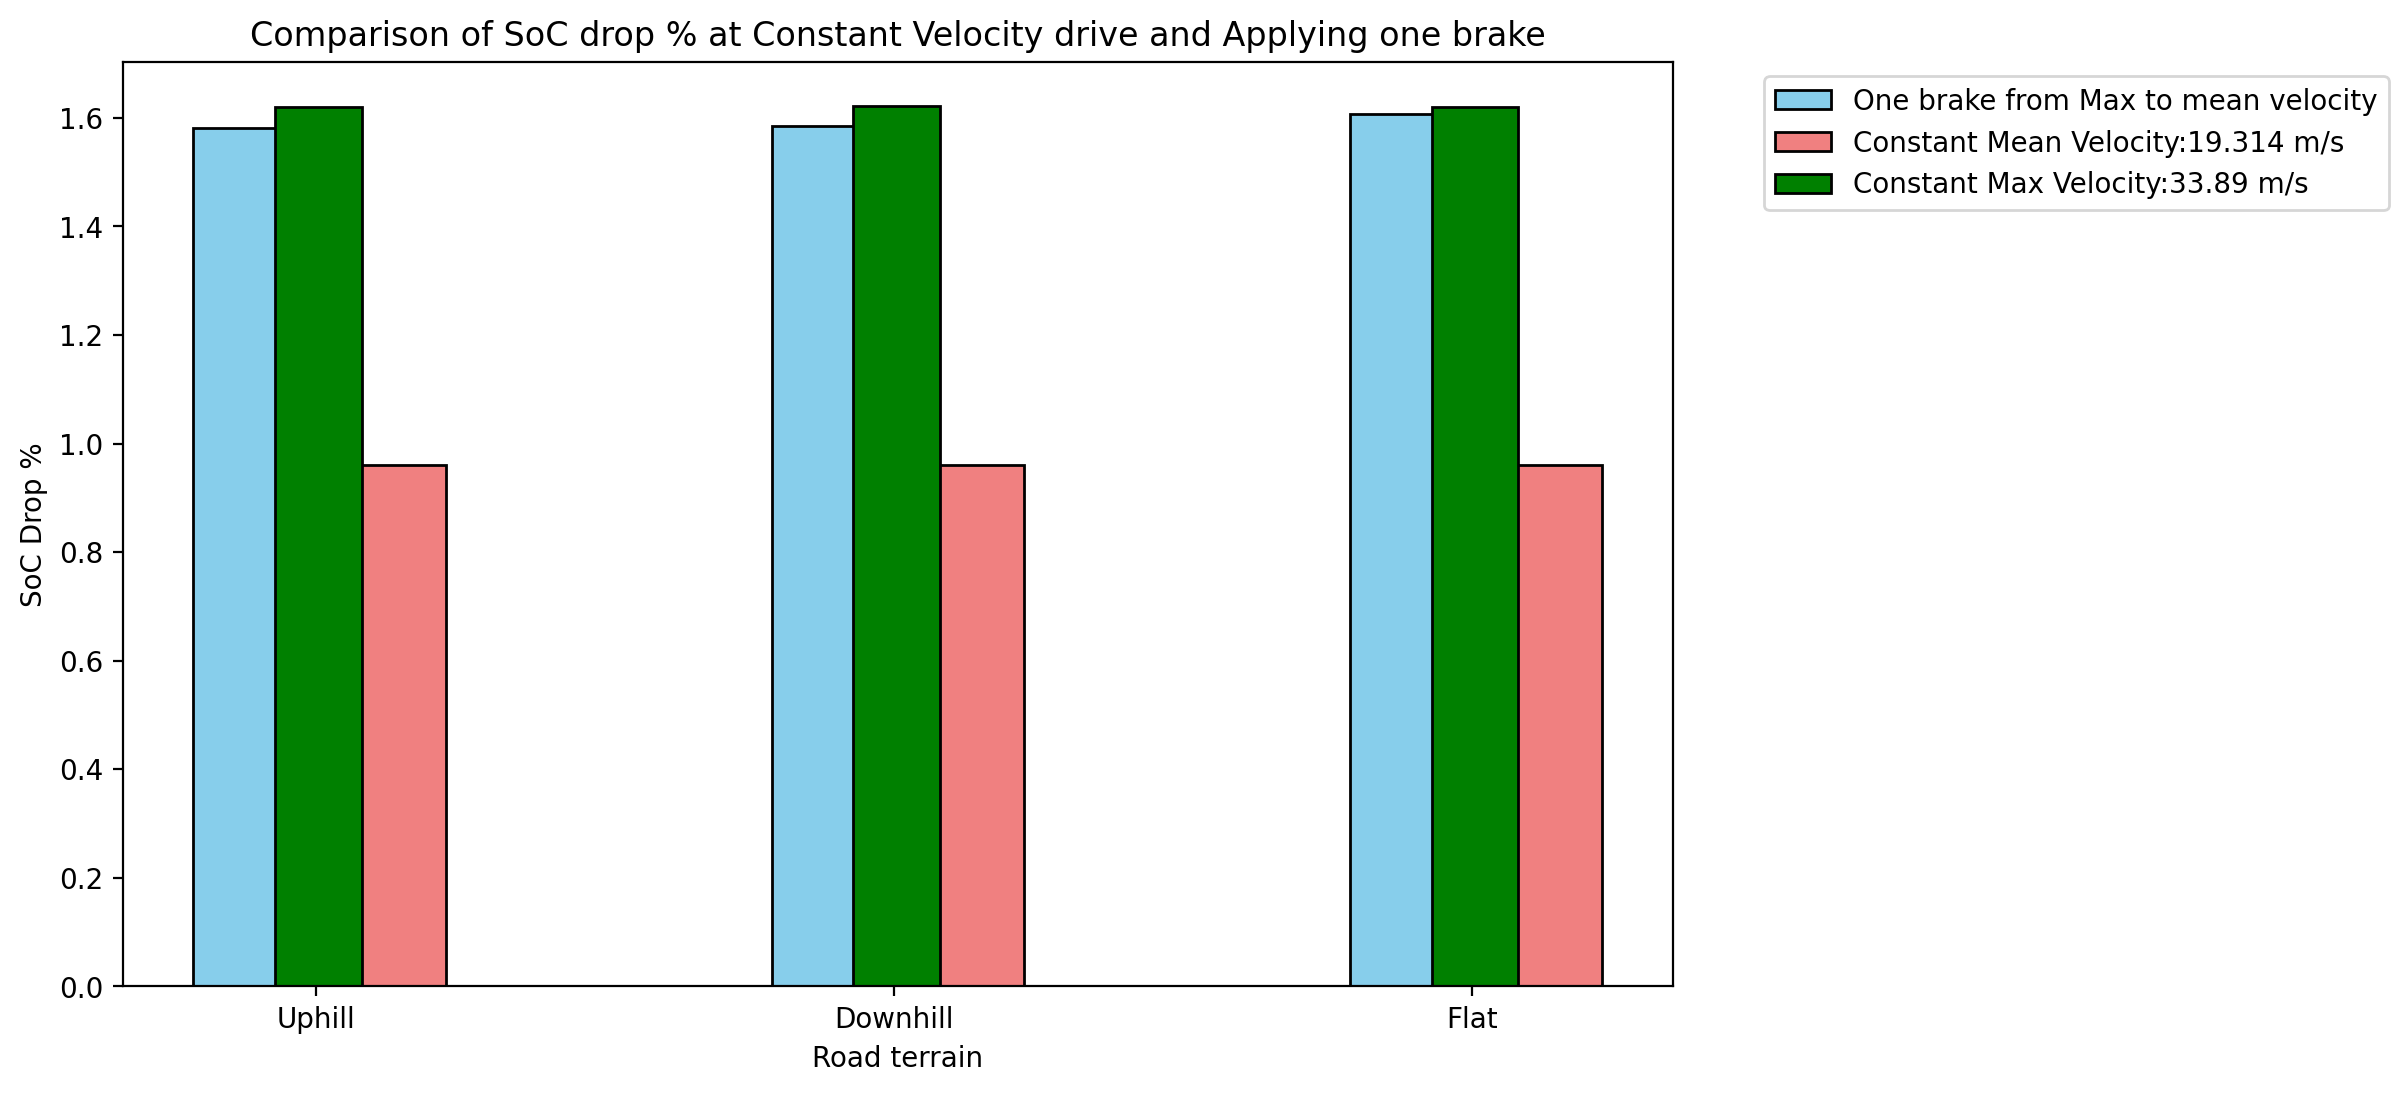

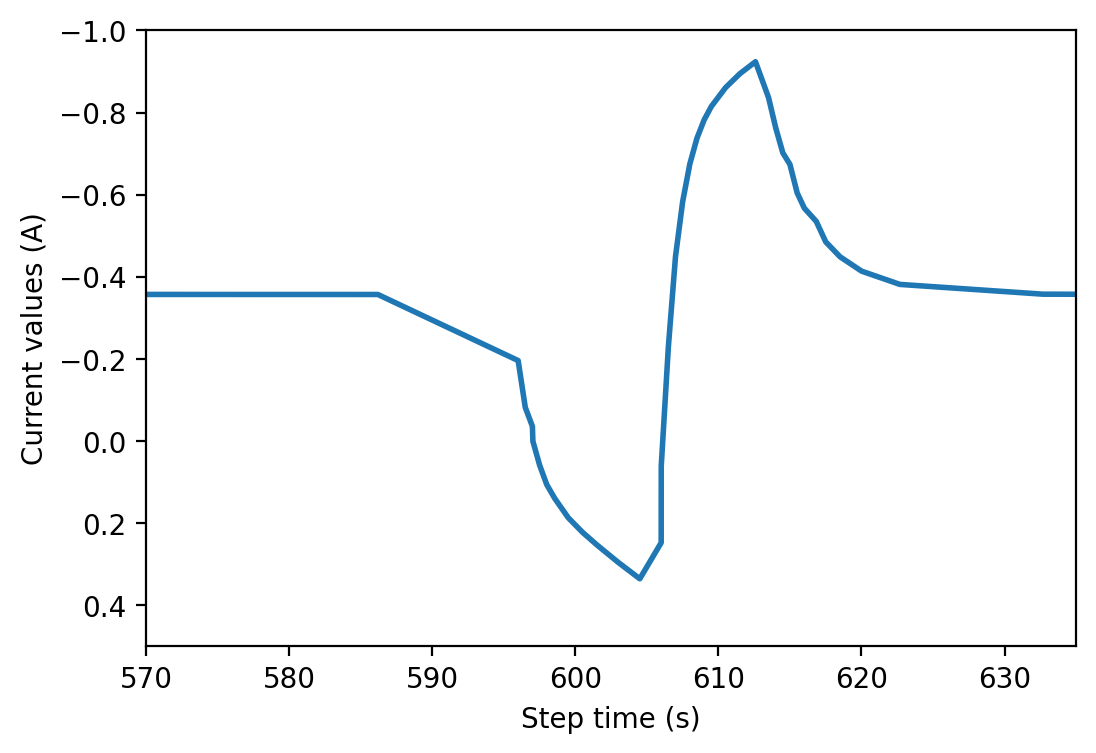

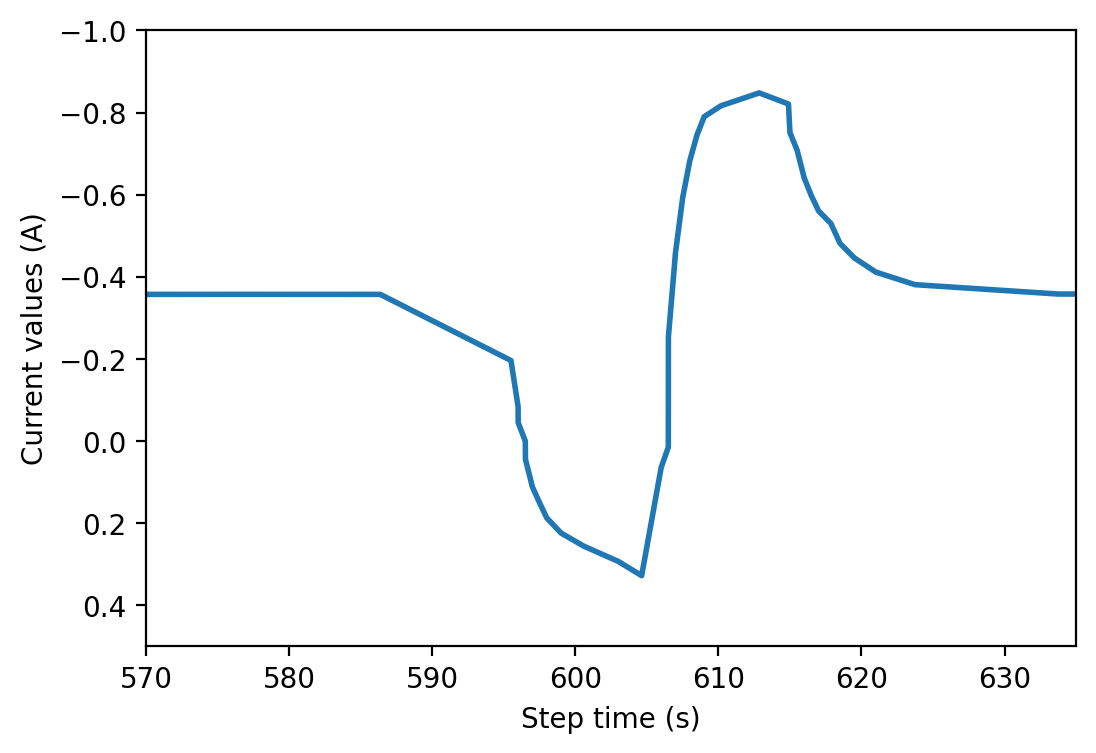

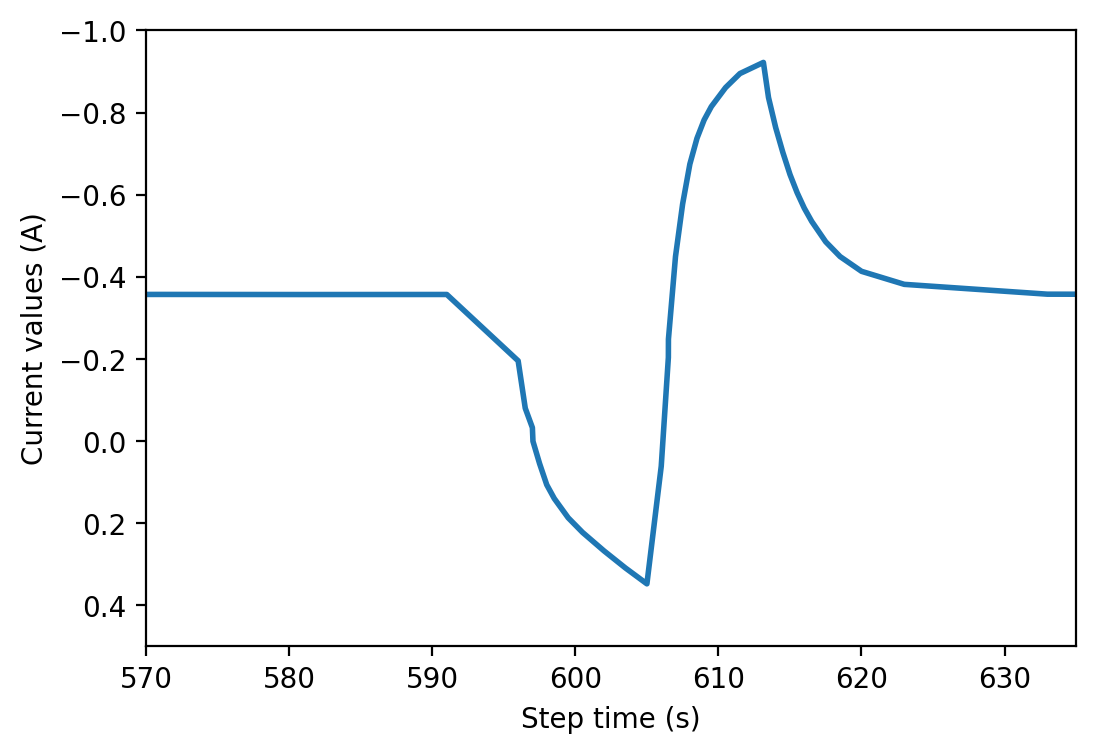

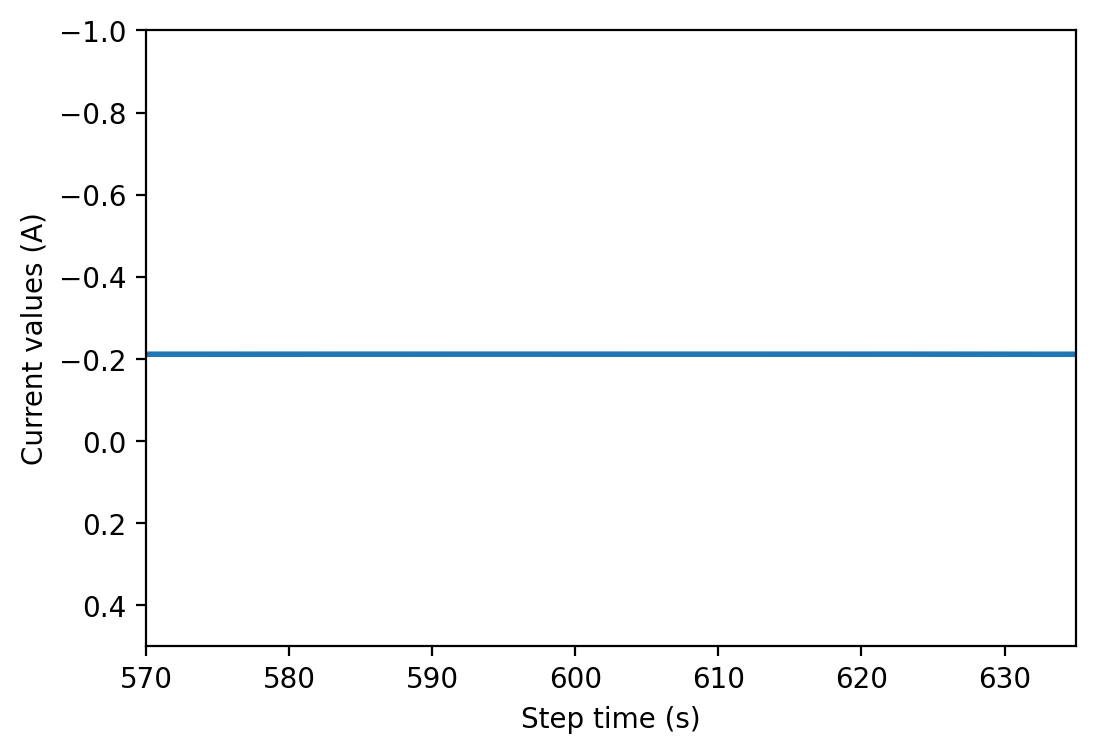

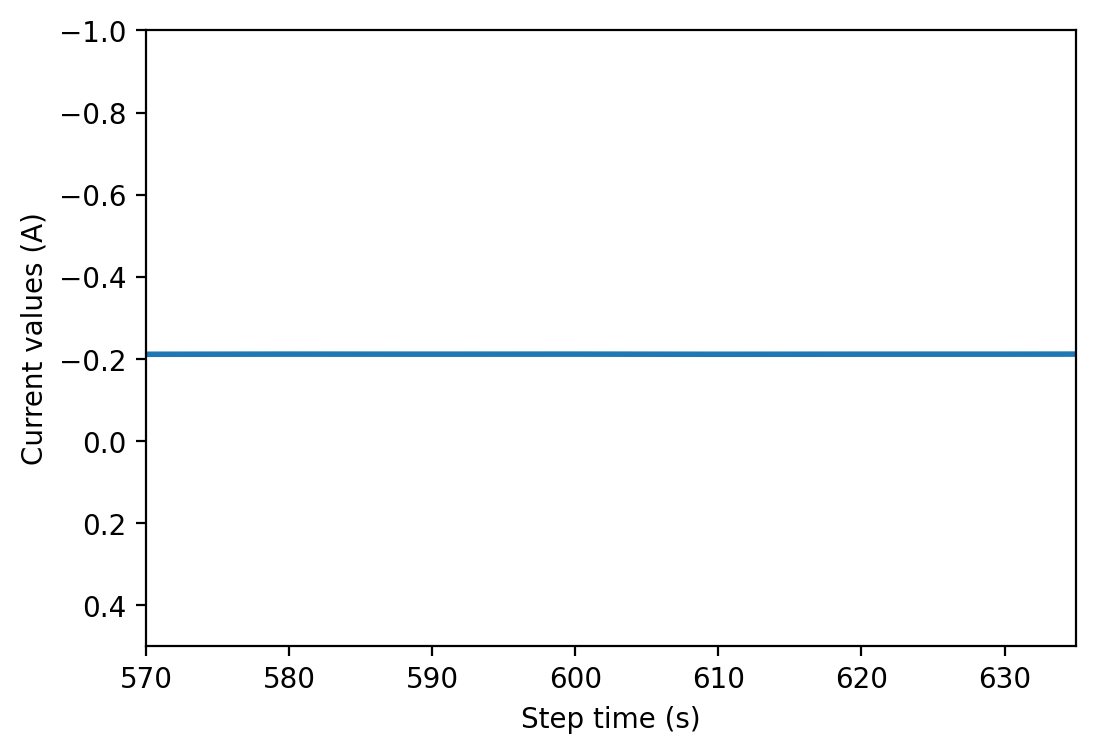

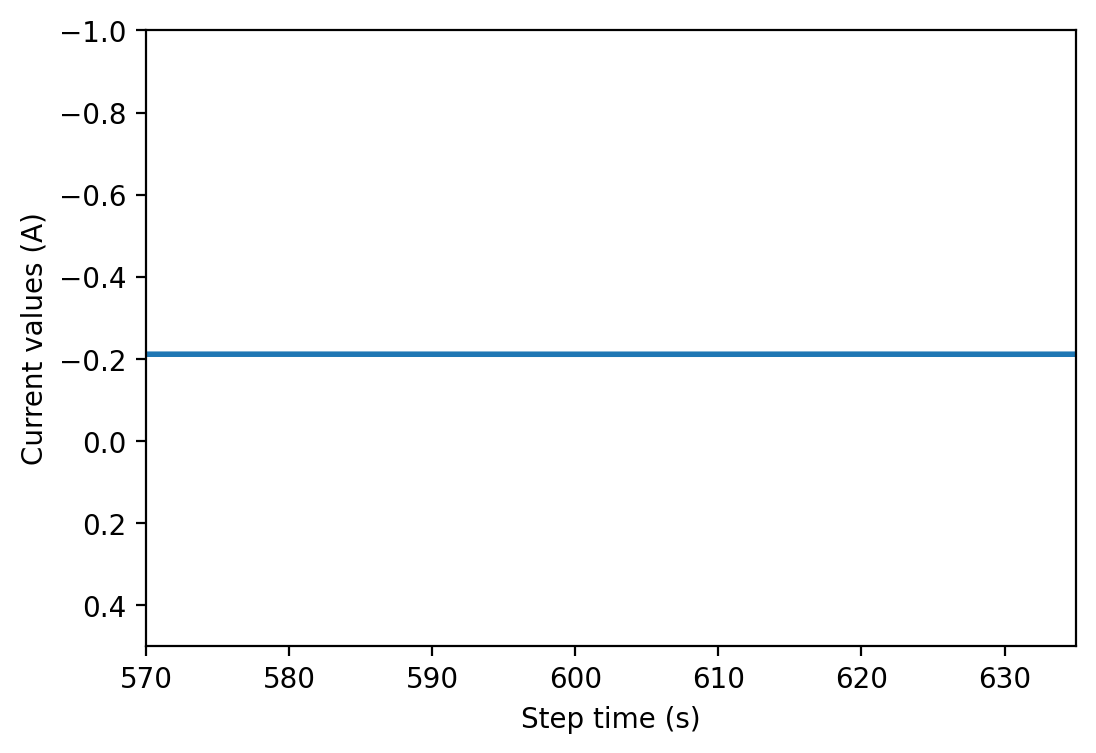

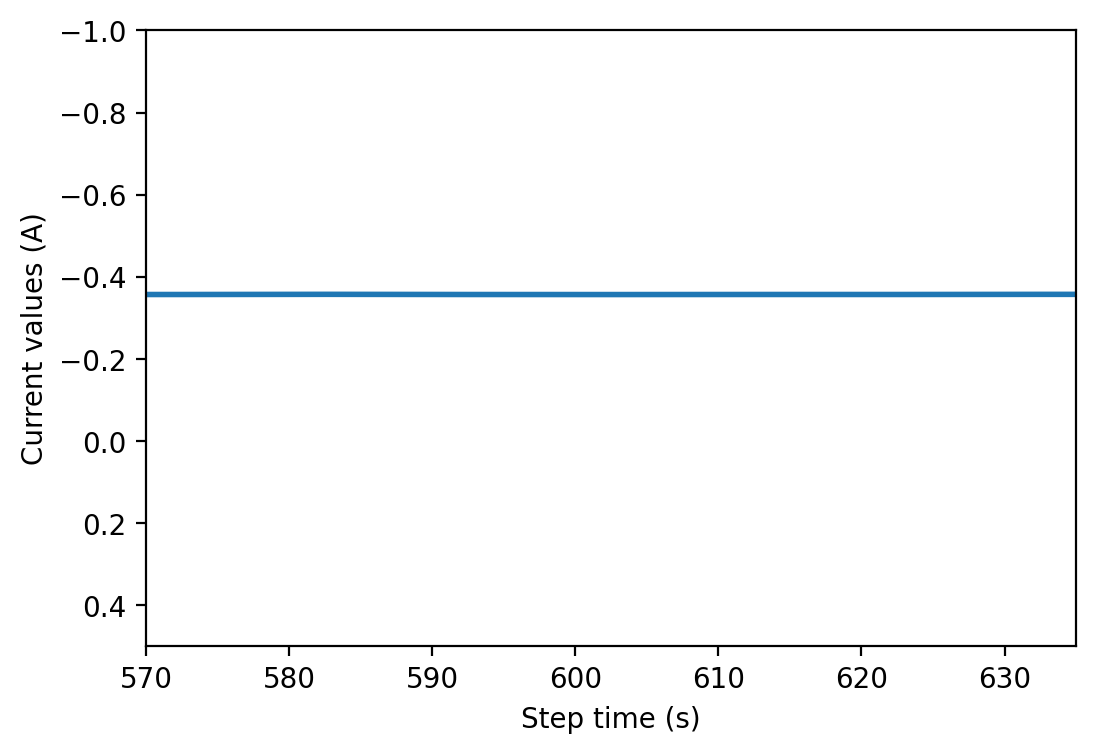

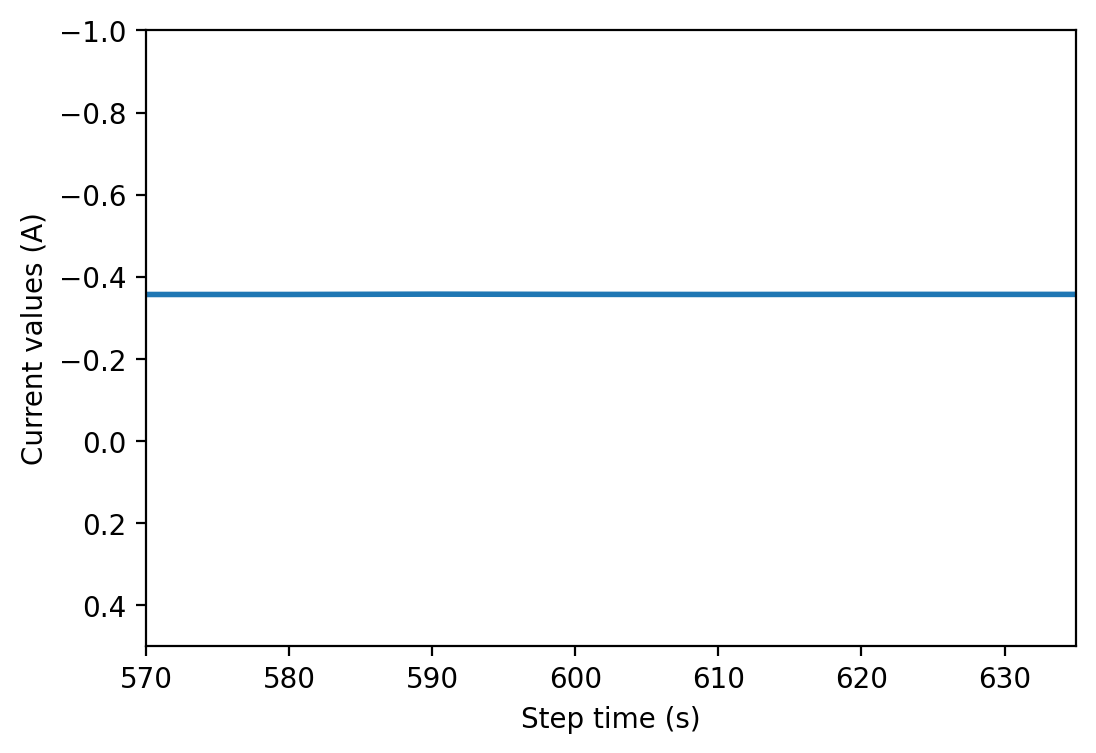

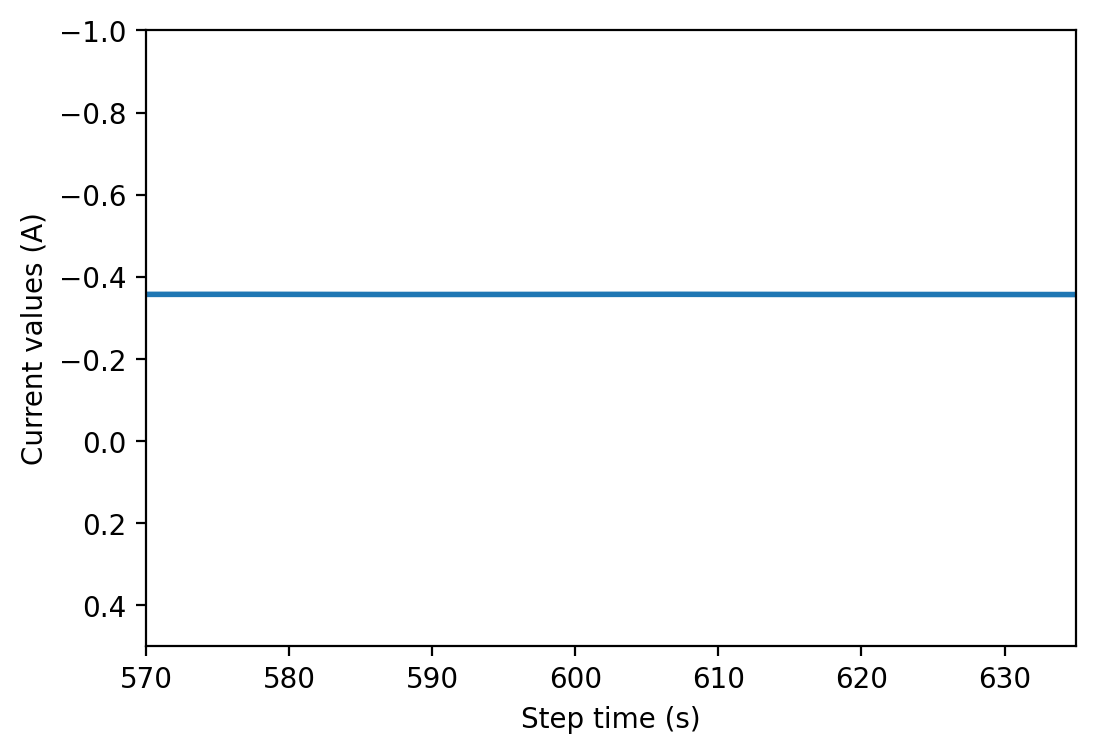

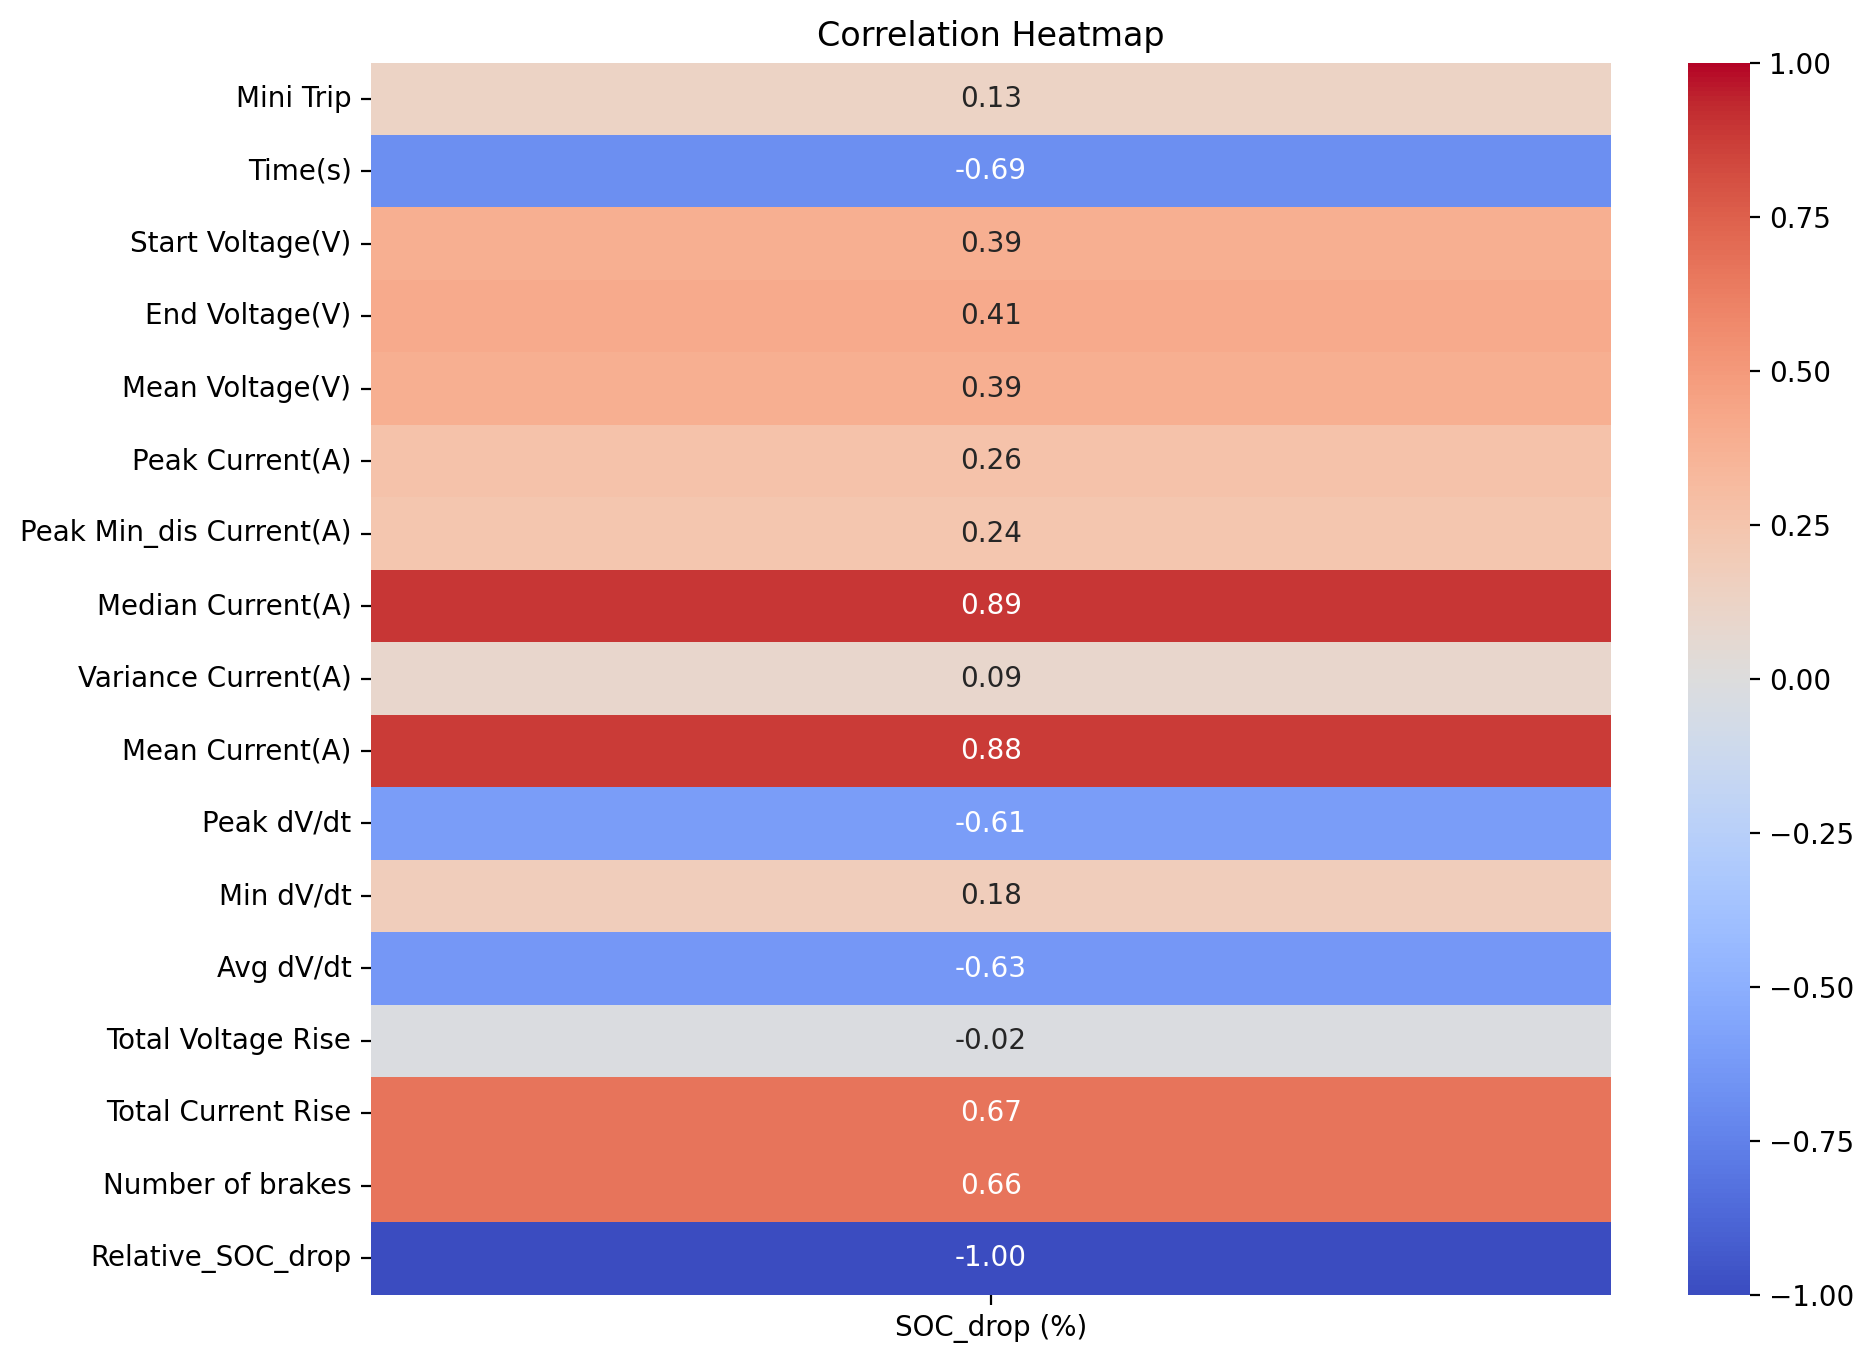

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
import sys, os
from tqdm import tqdm
from scipy import stats
import multiprocessing as mp
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared

warnings.filterwarnings("ignore", category=ConvergenceWarning)

%run Test_data_create.ipynb

In [2]:
def curve_plot(mape_t, label, color):
    # Calculate mean and standard error
    mean_mape = np.mean(mape_t, axis=0)
    # std_error = np.std(mape_t, axis=0) / np.sqrt(mape_t.shape[0])

    # # Calculate confidence interval
    # confidence = 0.95
    # n = mape_t.shape[0]
    # t = np.abs(stats.t.ppf((1 - confidence) / 2, n - 1))
    # margin_of_error = t * std_error
    # confidence_interval = margin_of_error

    plt.plot(np.arange(10), mean_mape[1::2] * 100, label = label, color = color)
    # plt.fill_between(np.arange(25/5, 501/5, 25/5), (mean_mape - confidence_interval) * 100, (mean_mape + confidence_interval) * 100, alpha = 0.2, color = tuple(np.array(color) / 2))

In [3]:
# Initialize lists
time_intervals = np.array(['300~\n350', '300~\n400', '300~\n450', '300~\n500', '300~\n550', '300~\n600', '300~\n650', '300~\n700', '300~\n750', '300~\n800'])
linear_mape1 = []
knn_mape1 = []
decision_tree_mape1 = []
random_forest_mape1 = []
gaussian_process_mape1 = []
extremely_randomized_trees_mape1 = []
neural_network_mape1 = []

# Read the file
with open('V_Model-1_Time-Resolved_mape_results_all_models.txt', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape1.append(float(data[1]))
        knn_mape1.append(float(data[2]))
        decision_tree_mape1.append(float(data[3]))
        random_forest_mape1.append(float(data[4]))
        gaussian_process_mape1.append(float(data[5]))
        extremely_randomized_trees_mape1.append(float(data[6]))
        neural_network_mape1.append(float(data[7]))

In [4]:
# Initialize lists
linear_mape2 = []
knn_mape2 = []
decision_tree_mape2 = []
random_forest_mape2 = []
gaussian_process_mape2 = []
extremely_randomized_trees_mape2 = []
neural_network_mape2 = []

# Read the file
with open('V_Model-2_Time-Resolved_mape_results_all_models.txt', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape2.append(float(data[1]))
        knn_mape2.append(float(data[2]))
        decision_tree_mape2.append(float(data[3]))
        random_forest_mape2.append(float(data[4]))
        gaussian_process_mape2.append(float(data[5]))
        extremely_randomized_trees_mape2.append(float(data[6]))
        neural_network_mape2.append(float(data[7]))

ValueError: keyword labelfontfamily is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

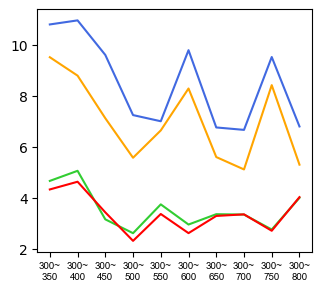

In [5]:
plot1 = np.load('plot1.npy')
plot2 = np.load('plot2.npy')
plt.figure(figsize = (9/2.54, 8/2.54))
plt.plot(np.arange(10), random_forest_mape1, label = 'Using velocity features', color = 'royalblue')
plt.plot(np.arange(10), random_forest_mape2, label = 'Using velocity and classification features', color = 'orange')
curve_plot(plot1[9], 'Using battery test features', 'limegreen')
curve_plot(plot2[9], 'Using battery test and classification features', 'red')
plt.xticks(np.arange(10), time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)
# plt.title("Using random forest", fontname='Arial', fontsize=9)
# plt.xlim((0, 9))
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.savefig('plot3.png', format='png', dpi=1000)
plt.show()

ValueError: keyword labelfontfamily is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

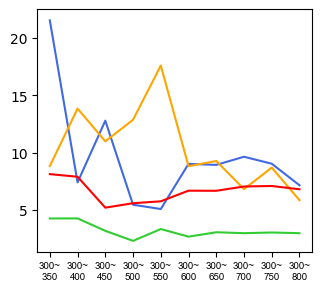

In [6]:
plt.figure(figsize = (9/2.54, 8/2.54))
plt.plot(np.arange(10), gaussian_process_mape1, label = 'Using velocity features', color = 'royalblue')
plt.plot(np.arange(10), gaussian_process_mape2, label = 'Using velocity and classification features', color = 'orange')
curve_plot(plot1[11], 'Using battery test features', 'limegreen')
curve_plot(plot2[11], 'Using battery test and classification features', 'red')
plt.xticks(np.arange(10), time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)
# plt.title("Using Gaussian process", fontname='Arial', fontsize=9)
# plt.xlim((0, 9))
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.savefig('plot4.png', format='png', dpi=1000)
plt.show()

ValueError: keyword labelfontfamily is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

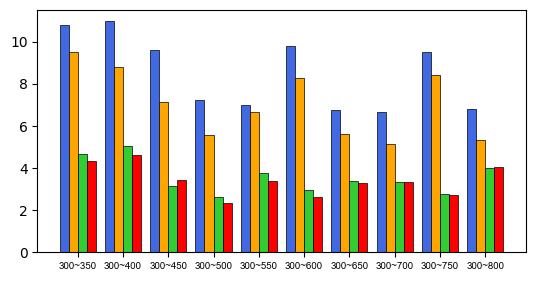

In [7]:
plt.figure(figsize=(16/2.54, 8/2.54))
time_intervals = np.array(['300~350', '300~400', '300~450', '300~500', '300~550', '300~600', '300~650', '300~700', '300~750', '300~800'])


# Create bar plots with edges
bar_width = 0.2  # Width of the bars
index = np.arange(10)

plt.bar(index - 1/2 * bar_width, random_forest_mape1, width=bar_width, label='Model 1 - Using velocity features', color='royalblue', edgecolor='black', linewidth=0.5)
plt.bar(index + 1/2 * bar_width, random_forest_mape2, width=bar_width, label='Model 2 - Using velocity and classification features', color='orange', edgecolor='black', linewidth=0.5)
plt.bar(index + 3/2 * bar_width, np.mean(plot1[9], axis=0)[1::2] * 100, width=bar_width, label='Model 3 - Using battery test features', color='limegreen', edgecolor='black', linewidth=0.5)
plt.bar(index + 5/2 * bar_width, np.mean(plot2[9], axis=0)[1::2] * 100, width=bar_width, label='Model 4 - Using battery test and classification features', color='red', edgecolor='black', linewidth=0.5)

plt.xticks(index + bar_width, time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)

# Adjust the legend and layout
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()

# Save the plot
plt.savefig('plot5.png', format='png', dpi=1000)
plt.show()

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_31901/2516409930.py:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


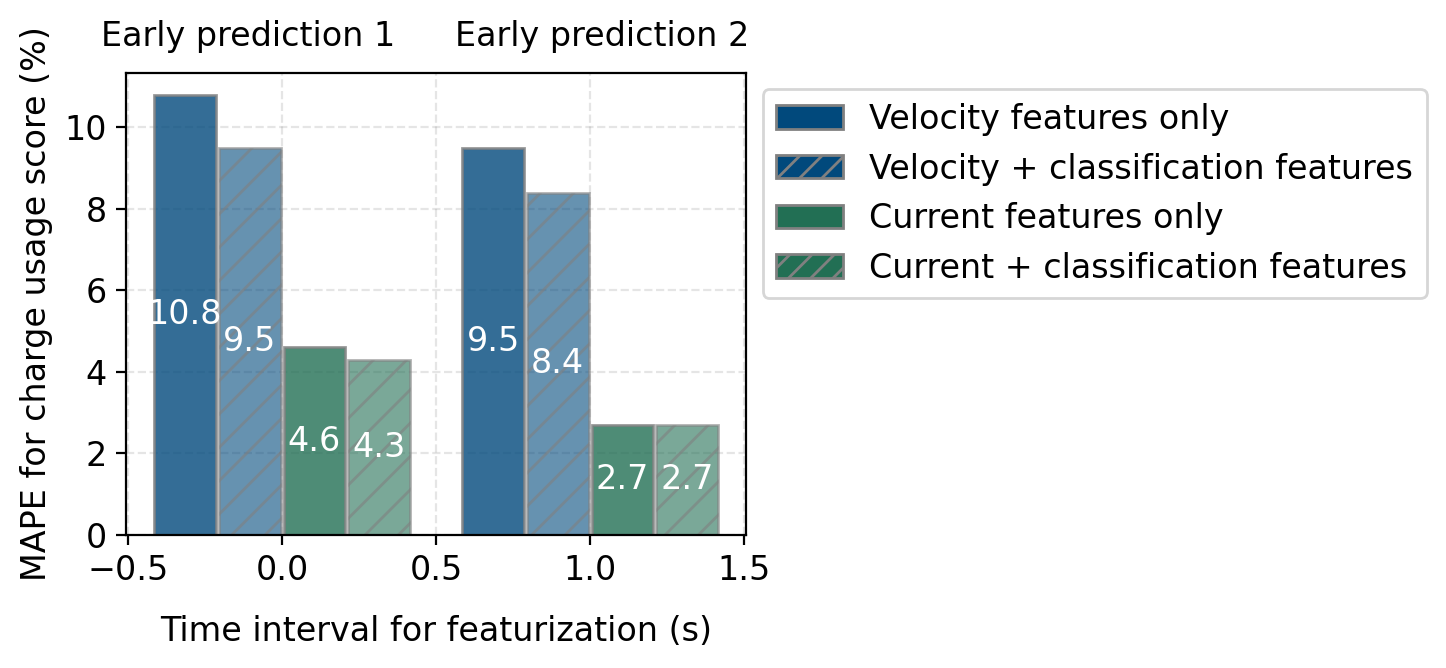

In [152]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots(figsize=(4, 3))

first_index_values = [10.8, 9.5, 4.6, 4.3]
eighth_index_values = [9.5, 8.4, 2.7, 2.7]

bar_labels = ['velocity features only', 'velocity features + classification features',
              'current features only', 'current features + classification features']
x_labels = ['300-350', '300-750']

bar_width = 0.20
gap = 0.01

positions1 = [0 - 1.5 * (bar_width + gap), 0 - 0.5 * (bar_width + gap),
              0 + 0.5 * (bar_width + gap), 0 + 1.5 * (bar_width + gap)]
positions2 = [1 - 1.5 * (bar_width + gap), 1 - 0.5 * (bar_width + gap),
              1 + 0.5 * (bar_width + gap), 1 + 1.5 * (bar_width + gap)]

for i in range(len(first_index_values)):
    if i == 0:
        color, hatch, alpha = '#01497c', None, 0.8
    elif i == 1:
        color, hatch, alpha = '#01497c', '//', 0.6
    elif i == 2:
        color, hatch, alpha = '#226f54', None, 0.8
    elif i == 3: 
        color, hatch, alpha = '#226f54', '//', 0.6 

    plt.bar(positions1[i], first_index_values[i], width=bar_width, color=color, hatch=hatch, ec = "grey", alpha = alpha)
    plt.bar(positions2[i], eighth_index_values[i], width=bar_width, color=color, hatch=hatch, ec = "grey", alpha = alpha)

    plt.text(positions1[i], first_index_values[i] / 2, f'{first_index_values[i]:.1f}', 
             ha='center', va='center', color='w')
    plt.text(positions2[i], eighth_index_values[i] / 2, f'{eighth_index_values[i]:.1f}', 
             ha='center', va='center', color='w')

# Add group annotations
group1_center = sum(positions1[:2]) / 2  # Center of the first group
group2_center = sum(positions2[:2]) / 2  # Center of the second group

ax1.text(group1_center+.10, 12, 'Early prediction 1', ha='center')
ax1.text(group2_center+.25, 12, 'Early prediction 2', ha='center')

plt.xlabel('Time interval for featurization (s)',labelpad=10)
plt.ylabel('MAPE for charge usage score (%)')

legend_handles = [
    Patch(facecolor='#01497c', edgecolor='grey', label='Velocity features only', hatch=None),
    Patch(facecolor='#01497c', edgecolor='grey', label='Velocity + classification features', hatch='///'),
    Patch(facecolor='#226f54', edgecolor='grey', label='Current features only', hatch=None),
    Patch(facecolor='#226f54', edgecolor='grey', label='Current + classification features', hatch='///')]

plt.legend(handles=legend_handles, bbox_to_anchor=(1,1), loc='upper left', ncol=1)

plt.grid(color="grey", alpha=0.2, linestyle="--")
plt.gca().set_axisbelow(True)
plt.tight_layout()
fig.savefig('/Users/hemanthnr/Desktop/batt_patt figures/ep1vsep2.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()